In [176]:
# ignoring warnings in the final version
import warnings
warnings.filterwarnings('ignore')

In [177]:
import os
import numpy as np
import pandas as pd
import sklearn.ensemble as ske
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [142]:
def test_validation_holdout_split(X,Y,testsize):
        randomstate = 51
        X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size = testsize,random_state = randomstate)
        X_train,X_holdout,Y_train,Y_holdout = train_test_split(X_train,Y_train,test_size = testsize,random_state = randomstate)
        return X_train,X_validation,X_holdout,Y_train,Y_validation,Y_holdout


In [143]:
#This function returns a 1 if a prospect has responded to atleast one campaign
def gen_target(x):
    responded = ['Coupon Response','Inbound Response','Lead generated as booth','Booth Visitor','Request More Information','Digital','Inbound Email']
    return bool(len(set(responded).intersection(set(x))))

In [144]:
os.chdir('/home/sreddy/AssociationAnalytics')

In [145]:
#salesnet_experian is the output of code salesnet_experian_match_extract.txt query.
se = pd.read_csv('data/salesnet_experian.csv',header = None)

In [146]:
se.columns = ['contact_id', 'assn_name', 'work_addr1', 'name_first', 'name_last', 'match_confidence', 'cms_name', 'response_dt', 'cms_note', 'cmpgn_id', 'address_id', 'address_state_code', 'address_state', 'address_zip_code', 'address_city_name', 'address_house_number', 'address_street_name', 'address_street_suffix', 'address_primary_address', 'address_secondary_address', 'address_quality_indicator', 'address_county_code', 'address_county_name', 'census_2010_tract_and_block_group', 'address_geo_match_level_for_geo_data', 'census_cape_educ_ispsa', 'census_cape_educ_ispsa_decile', 'census_cape_inc_family_inc_state_decile', 'address_time_zone', 'living_unit_id', 'address_phone_special_usage_phone', 'address_phone_number_2', 'property_dwelling_unit_size', 'property_dwelling_type', 'living_unit_est_household_income_v5', 'property_homeowner_probability_model', 'property_homeowner_combined_homeowner_renter', 'address_ncoa_move_update_method_code', 'address_ncoa_move_update_date', 'address_rec_reliable_code', 'living_unit_mail_responder_flag_indicator', 'living_unit_home_business_flag_indicator', 'living_unit_length_of_residence', 'living_unit_number_of_persons_in_living_unit', 'living_unit_number_of_adults_in_living_unit', 'census_rural_urban_county_size_code', 'living_unit_last_activity_date', 'person_1_person_id_number', 'person_1_person_type', 'person_1_name_first_name', 'person_1_name_surname', 'person_1_ethnic', 'person_1_ethnic_experian_group', 'person_1_ethnic_religion', 'person_1_ethnic_language', 'person_1_ethnic_group', 'person_1_ethnic_country_of_origin', 'person_1_gender', 'person_1_age_combined_age', 'person_1_education_model', 'person_1_marital_status', 'person_1_occupation_code', 'person_1_business_owner', 'person_1_occupation_group', 'person_2_person_id_number', 'person_2_person_type', 'person_2_name_first_name', 'person_2_name_surname', 'person_2_ethnic', 'person_2_ethnic_experian_group', 'person_2_ethnic_religion', 'person_2_ethnic_language', 'person_2_ethnic_group', 'person_2_ethnic_country_of_origin', 'person_2_gender', 'person_2_age_combined_age', 'person_2_education_model', 'person_2_marital_status', 'person_2_occupation_code', 'person_2_business_owner', 'person_2_occupation_group_v2', 'children_number_of_children_in_living_unit', 'children_presence_of_child_0_18', 'children_age_0_3', 'children_age_0_3_score', 'children_age_0_3_gender', 'children_age_4_6', 'children_age_4_6_score', 'children_age_4_6_gender', 'children_age_7_9', 'children_age_7_9_score', 'children_age_7_9_gender', 'children_age_10_12', 'children_age_10_12_score', 'children_age_10_12_gender', 'children_age_13_15', 'children_age_13_15_score', 'children_age_13_15_gender', 'children_age_16_18', 'children_age_16_18_score', 'children_age_16_18_gender', 'mail_order_responder_mor_bank_upscale_merchandise_buyer', 'mail_order_responder_mor_bank_male_merchandise_buyer', 'mail_order_responder_mor_bank_female_merchandise_buyer', 'mail_order_responder_mor_bank_crafts_hobby_merchandise_buyer', 'mail_order_responder_mor_bank_gardening_farming_buyer', 'mail_order_responder_mor_bank_book_buyer', 'mail_order_responder_mor_bank_collect_special_foods_buyer', 'mail_order_responder_mor_bank_gifts_and_gadgets_buyer', 'mail_order_responder_mor_bank_general_merchandise_buyer', 'mail_order_responder_mor_bank_family_and_general_magazine', 'mail_order_responder_mor_bank_female_oriented_magazine', 'mail_order_responder_mor_bank_male_sports_magazine', 'mail_order_responder_mor_bank_religious_magazine', 'mail_order_responder_mor_bank_gardening_farming_magazine', 'mail_order_responder_mor_bank_culinary_interests_magazine', 'mail_order_responder_mor_bank_health_and_fitness_magazine', 'mail_order_responder_mor_bank_do_it_yourselfers', 'mail_order_responder_mor_bank_news_and_financial', 'mail_order_responder_mor_bank_photography', 'mail_order_responder_mor_bank_opportunity_seekers_and_ce_sweepstakes', 'mail_order_responder_mor_bank_religious_contributor', 'mail_order_responder_mor_bank_political_contributor', 'mail_order_responder_mor_bank_health_and_institution_contributor', 'mail_order_responder_mor_bank_general_contributor', 'mail_order_responder_mor_bank_miscellaneous', 'mail_order_responder_mor_bank_odds_and_ends', 'mail_order_responder_mor_bank_deduped_category_hit_count', 'mail_order_responder_mor_bank_non_deduped_category_hit_count', 'property_mortgage_home_purchase_home_purchase_price', 'property_mortgage_home_purchase_home_purchase_date', 'property_realty_home_year_built', 'property_realty_home_land_value', 'property_realty_property_indicator', 'property_realty_year_built_confidence', 'property_realty_year_built', 'property_estimated_current_home_value', 'segmentation_green_aware', 'segmentation_green_aware_tiers', 'auto_in_the_market_new', 'auto_in_the_market_used', 'auto_in_the_market_used_0_5_vehicle', 'auto_in_the_market_used_6_10_vehicle', 'auto_in_the_market_used_11_plus_vehicle', 'self_reported_behaviorbank_donates_to_environmental_causes', 'self_reported_behaviorbank_contributes_to_charities', 'self_reported_behaviorbank_presence_of_credit_card', 'self_reported_behaviorbank_presence_of_premium_credit_card', 'self_reported_behaviorbank_interest_in_reading', 'self_reported_behaviorbank_computers_peripherals', 'segmentation_mosaic_household', 'segmentation_mosaic_zip4', 'segmentation_mosaic_global_household', 'segmentation_mosaic_global_zip4', 'living_unit_household_composition', 'census_cape_inc_hh_median_family_household_income', 'census_cape_age_pop_median_age', 'census_cape_age_pop_pct_0_17', 'census_cape_age_pop_pct_18_99_plus', 'census_cape_age_pop_pct_65_99_plus', 'census_cape_ethnic_pop_pct_white_only', 'census_cape_ethnic_pop_pct_black_only', 'census_cape_ethnic_pop_pct_asian_only', 'census_cape_ethnic_pop_pct_hispanic', 'census_cape_density_persons_per_hh_for_pop_in_hh', 'census_cape_hhsize_hh_average_household_size', 'census_cape_typ_hh_pct_married_couple_family', 'census_cape_child_hh_pct_with_persons_lt18', 'census_cape_child_hh_pct_marr_couple_famw_persons_lt18', 'census_cape_child_hh_pct_marr_couple_famw_o_persons_lt18', 'census_cape_lang_hh_pct_spanish_speaking', 'census_cape_educ_pop25_plus_median_education_attained', 'census_cape_homval_oohu_median_home_value', 'census_cape_hustr_hu_pct_mobile_home', 'census_cape_built_hu_median_housing_unit_age', 'census_cape_tenancy_occhu_pct_owner_occupied', 'census_cape_tenancy_occhu_pct_renter_occupied', 'census_core_based_statistical_areas_cbsa', 'census_core_based_statistical_area_type', 'property_realty_home_total_value', 'property_realty_total_tax', 'property_realty_home_improvement_value', 'property_realty_home_land_square_footage', 'property_realty_home_land_front_footage', 'property_realty_home_land_depth_footage', 'property_realty_home_stories', 'property_realty_home_swimming_pool_indicator', 'property_realty_home_total_rooms', 'property_realty_home_building_square_footage', 'property_realty_home_bedrooms', 'property_realty_home_bath', 'property_realty_home_base_square_footage', 'property_realty_home_fireplaces', 'property_realty_home_floor_cover_indicator', 'property_realty_home_heat_indicator', 'property_realty_home_air_conditioning', 'property_realty_home_exterior_wall_type', 'property_realty_building_construction_indicator', 'self_reported_behaviorbank_interest_in_gardening', 'self_reported_behaviorbank_interest_in_automotive', 'self_reported_behaviorbank_interest_in_gourmet_cooking', 'self_reported_behaviorbank_home_decorating_furnishing', 'self_reported_behaviorbank_dog_enthusiasts', 'self_reported_behaviorbank_cat_enthusiasts', 'self_reported_behaviorbank_pet_enthusiast', 'self_reported_behaviorbank_interest_in_travel', 'self_reported_behaviorbank_interest_in_fitness', 'self_reported_behaviorbank_interest_in_the_outdoors', 'self_reported_behaviorbank_interest_in_sports', 'self_reported_behaviorbank_investors', 'self_reported_behaviorbank_purchased_through_the_mail', 'self_reported_behaviorbank_cruise_enthusiasts', 'self_reported_behaviorbank_invests_in_mutual_funds_annuities', 'self_reported_behaviorbank_internet_online_subscriber', 'self_reported_behaviorbank_purchase_via_online', 'self_reported_behaviorbank_domestic_traveler', 'self_reported_behaviorbank_foreign_traveler', 'property_mortgage_home_purchase_type_of_purchase', 'property_mortgage_home_purchase_mortgage_amount', 'property_mortgage_home_purchase_mortgage_lender_name_v2', 'property_mortgage_home_purchase_mortgage_rate_type', 'property_mortgage_home_purchase_mortgage_term_in_months', 'property_mortgage_home_purchase_mortgage_loan_type', 'property_mortgage_home_purchase_down_payment_pct_', 'property_mortgage_home_purchase_deed_date_of_equity_loan', 'property_mortgage_home_purchase_equity_amount_in_thousands', 'property_mortgage_home_purchase_equity_lender_name_v2', 'property_mortgage_home_purchase_equity_rate_type', 'property_mortgage_home_purchase_equity_term', 'property_mortgage_home_purchase_equity_loan_type', 'property_mortgage_home_purchase_refinance_deed_date', 'property_mortgage_home_purchase_refinance_amount', 'property_mortgage_home_purchase_refinance_lender_name_v2', 'property_mortgage_home_purchase_refinance_rate_type', 'property_mortgage_home_purchase_refinance_term', 'property_mortgage_home_purchase_refinance_loan_type', 'investment_property_state_code', 'investment_property_type_of_investment', 'investment_property_date_of_warranty_deed', 'investment_property_purchase_amount', 'investment_property_type_of_purchase', 'investment_property_mortgage_amount', 'investment_property_mortgage_lender_name_v2', 'investment_property_mortgage_rate_type', 'investment_property_mortgage_term', 'investment_property_mortgage_loan_type', 'investment_property_deed_date_of_equity_loan', 'investment_property_equity_amount', 'investment_property_equity_lender_name_v2', 'investment_property_equity_rate_type', 'investment_property_equity_term', 'investment_property_equity_loan_type', 'investment_property_deed_date_of_refinance_loan',
              'investment_property_refinance_amount_in_thousands', 'investment_property_refinance_lender_name_v2', 'investment_property_refinance_rate_type', 'investment_property_refinance_term', 'investment_property_refinance_loan_type', 'investment_property_additional_investment_flag', 'property_realty_model_confidence_code_v2', 'property_realty_model_est_cur_mortgage_amount_code_v2', 'property_realty_model_est_cur_mortgage_amount_amt_v2', 'property_realty_model_confidence_code_v3', 'property_realty_model_est_cur_monthly_mortgage_pmt_cd_v2', 'property_realty_model_est_cur_monthly_mortgage_pmt_amt_v2', 'property_realty_model_confidence_code_v4', 'property_realty_model_est_cur_loan_to_value_ratio_v2', 'property_realty_model_confidence_code_v5', 'property_realty_model_est_available_equity_code_v2', 'property_realty_model_est_available_equity_amt_v2', 'library_model_hbo_watchers_model', 'library_model_motorcycle_afficionados_model', 'library_model_frequent_family_restaurant_diner_model', 'library_model_frequent_fast_food_diner_model', 'library_model_opening_weekend_movie_goers_model', 'library_model_action_adventure_movie_lovers_model', 'library_model_comedy_and_romantic_comedy_movie_lovers_model', 'library_model_family_film_buff_model', 'library_model_couch_potatoes_drama_lovers_model', 'library_model_couch_potatoes_comedy_model', 'library_model_couch_potatoes_female_focus_model', 'library_model_couch_potatoes_fanboy_model', 'library_model_visa_signature_owners_model', 'library_model_mastercard_model', 'library_model_debit_card_user_model', 'library_model_brokerage_account_owners_model', 'library_model_retirement_account_owners_model', 'library_model_american_express_owner_and_user_model', 'library_model_heavy_visa_owner_and_user_model', 'library_model_discover_card_owner_and_user_model', 'library_model_credit_card_revolver_model_pay_min_', 'library_model_credit_card_transactor_model_pay_all_', 'library_model_heavy_amex_visa_card_user_non_mastercard_heavy_user_model', 'library_model_dental_hygiene_enthusiast_model', 'library_model_travel_rewards_enthusiast_model', 'library_model_imported_light_beer_enthusiast_model', 'library_model_home_improvement_model', 'library_model_active_pragmatist_model', 'library_model_heavy_online_shopper_model', 'library_model_walmart_general_store_shopper_model', 'library_model_walmart_super_store_1_3_time_shopper_model', 'library_model_walmart_super_store_4_9_time_shopper_model', 'library_model_walmart_super_store_10_plus_time_shopper_model', 'library_model_microsoft_offfice_2010_likely_buyers_model', 'library_model_bundled_telco_internet_tv_offers_model', 'library_model_heavy_cellular_user_model', 'library_model_highend_smart_phone_model', 'library_model_prepaid_phone_and_calling_card_model', 'library_model_heavy_traveler_model', 'library_model_frequent_movie_attendee_model', 'library_model_cruise_ship_vacationers_model', 'library_model_technology_enthusiast_model', 'library_model_frequent_flyer_program_member_model', 'library_model_wealth_investor_model_high_investment_value', 'library_model_emerging_investor_model_mid_investment_value', 'library_model_heavy_vacationer_model', 'library_model_gamer_model', 'library_model_dell_computer_model', 'library_model_mobirati_simmons_mobile_segment_model', 'library_model_mobile_professionals_simmons_mobile_segment_model', 'library_model_general_family_restaurant_model', 'library_model_tax_shelter_model', 'library_model_professional_service_prepared_tax_return_model', 'library_model_self_perpared_tax_return_model', 'library_model_disney_theme_park_visitor_model', 'library_model_wet_dog_food_model', 'library_model_non_department_store_makeup_brand_user_model', 'library_model_department_store_makeup_brand_user_model', 'library_model_apple_mac_purchaser_model', 'library_model_apple_ipod_iphone_owner_model', 'library_model_wine_lover', 'library_model_highend_spirit_drinkers', 'library_model_coin_collector', 'library_model_oprah_fan', 'library_model_family_office', 'library_model_online_tax_software_user', 'library_model_offline_tax_software_user', 'library_model_grammy_watcher', 'library_model_nfl_enthusiast', 'library_model_nascar_enthusiast', 'library_model_college_basketball_enthusiast', 'library_model_pga_tour_enthusiast', 'library_model_mlb_enthusiast', 'library_model_nhl_enthusiast', 'library_model_nba_enthusiast', 'library_model_summer_olympic_enthusiast', 'library_model_documentary_foreign_language_movie_buff', 'library_model_drama_movie_buff', 'library_model_scifi_movie_buff', 'library_model_thriller_movie_buff', 'library_model_horror_movie_buff', 'library_model_feature_phone_owner', 'library_model_tv_animation_genre', 'library_model_tv_movies', 'library_model_game_shows', 'library_model_tv_how_to_shows', 'library_model_tv_history_genre', 'library_model_tv_news', 'library_model_reality_tv_shows', 'library_model_tennis_on_tv', 'library_model_political_viewing_on_tv', 'library_model_occasional_family_restaurants', 'library_model_occasional_fast_food_restaurants', 'library_model_aarp_members', 'library_model_guy_shows_on_tv', 'library_model_top_chef', 'library_model_college_football_bowls', 'library_model_fast_n_loud_discovery', 'library_model_oscars_it_s_all_about_the_celebrities', 'library_model_oscars_celebrity_fashion_follower', 'library_model_heavy_hotel_stayers', 'library_model_shows_for_teen_girls', 'library_model_family_dollar_top_shopper_model', 'library_model_coupon_moms', 'library_model_winter_olympics', 'segmentation_financial_behaviors_and_wealth_of_household']

In [147]:
se.living_unit_id = se.living_unit_id.apply(lambda x: str(int(x)).zfill(10))
se.address_id = se.address_id.apply(lambda x: str(int(x)).zfill(10))

In [148]:
# These are the initial subset of columns selected for the modeling.
# This excludes columns with more than 50% missing data and also identifier columns that are unusable, like names etc

sem = se[['contact_id', 'assn_name', 'match_confidence', 'cms_name', 'address_id', 'address_state',
          'address_quality_indicator', 'address_geo_match_level_for_geo_data', 'census_cape_educ_ispsa_decile', 
          'census_cape_inc_family_inc_state_decile', 'living_unit_id', 'property_dwelling_unit_size', 'property_dwelling_type', 'living_unit_est_household_income_v5', 'property_homeowner_combined_homeowner_renter', 'address_ncoa_move_update_method_code', 'address_rec_reliable_code', 'living_unit_mail_responder_flag_indicator', 'living_unit_home_business_flag_indicator', 'living_unit_length_of_residence', 'living_unit_number_of_persons_in_living_unit', 'living_unit_number_of_adults_in_living_unit', 'census_rural_urban_county_size_code', 'person_1_ethnic_experian_group', 'person_1_ethnic_religion', 'person_1_ethnic_language', 'person_1_ethnic_group', 'person_1_ethnic_country_of_origin', 'person_1_gender', 'person_1_age_combined_age', 'person_1_education_model', 'person_1_marital_status', 'person_1_business_owner', 'person_1_occupation_group', 'person_2_person_type', 'person_2_ethnic_experian_group', 'person_2_ethnic_religion', 'person_2_ethnic_language', 'person_2_ethnic_group', 'person_2_ethnic_country_of_origin', 'person_2_gender', 'person_2_age_combined_age', 'person_2_education_model', 'person_2_marital_status', 'person_2_business_owner', 'person_2_occupation_group_v2', 'children_presence_of_child_0_18', 'children_age_0_3', 'children_age_0_3_score', 'children_age_4_6', 'children_age_4_6_score', 'children_age_7_9', 'children_age_7_9_score', 'children_age_10_12', 'children_age_10_12_score', 'children_age_13_15', 'children_age_13_15_score', 'children_age_16_18', 'children_age_16_18_score', 'mail_order_responder_mor_bank_deduped_category_hit_count', 'mail_order_responder_mor_bank_non_deduped_category_hit_count', 'property_mortgage_home_purchase_home_purchase_price', 'property_mortgage_home_purchase_home_purchase_date', 'property_realty_home_year_built', 'property_realty_home_land_value', 'property_realty_property_indicator', 'property_realty_year_built_confidence', 'property_realty_year_built', 'property_estimated_current_home_value', 'segmentation_green_aware', 'segmentation_green_aware_tiers', 'auto_in_the_market_new', 'auto_in_the_market_used', 'auto_in_the_market_used_0_5_vehicle', 'auto_in_the_market_used_6_10_vehicle', 'auto_in_the_market_used_11_plus_vehicle', 'self_reported_behaviorbank_donates_to_environmental_causes', 'self_reported_behaviorbank_contributes_to_charities', 'self_reported_behaviorbank_presence_of_credit_card', 'self_reported_behaviorbank_presence_of_premium_credit_card', 'self_reported_behaviorbank_interest_in_reading', 'self_reported_behaviorbank_computers_peripherals', 'segmentation_mosaic_household', 'segmentation_mosaic_zip4', 'segmentation_mosaic_global_household', 'segmentation_mosaic_global_zip4', 'living_unit_household_composition', 'census_cape_inc_hh_median_family_household_income', 'census_cape_age_pop_median_age', 'census_cape_age_pop_pct_0_17', 'census_cape_age_pop_pct_18_99_plus', 'census_cape_age_pop_pct_65_99_plus', 'census_cape_ethnic_pop_pct_white_only', 'census_cape_ethnic_pop_pct_black_only', 'census_cape_ethnic_pop_pct_asian_only', 'census_cape_ethnic_pop_pct_hispanic', 'census_cape_density_persons_per_hh_for_pop_in_hh', 'census_cape_hhsize_hh_average_household_size', 'census_cape_typ_hh_pct_married_couple_family', 'census_cape_child_hh_pct_with_persons_lt18', 'census_cape_child_hh_pct_marr_couple_famw_persons_lt18', 'census_cape_child_hh_pct_marr_couple_famw_o_persons_lt18', 'census_cape_lang_hh_pct_spanish_speaking', 'census_cape_educ_pop25_plus_median_education_attained', 'census_cape_homval_oohu_median_home_value', 'census_cape_hustr_hu_pct_mobile_home', 'census_cape_built_hu_median_housing_unit_age', 'census_cape_tenancy_occhu_pct_owner_occupied', 'census_cape_tenancy_occhu_pct_renter_occupied', 'census_core_based_statistical_area_type', 'property_realty_home_total_value', 'property_realty_home_improvement_value', 'property_realty_home_land_square_footage', 'property_realty_home_swimming_pool_indicator', 'property_realty_home_building_square_footage', 'self_reported_behaviorbank_interest_in_gardening', 'self_reported_behaviorbank_interest_in_automotive', 'self_reported_behaviorbank_interest_in_gourmet_cooking', 'self_reported_behaviorbank_home_decorating_furnishing', 'self_reported_behaviorbank_dog_enthusiasts', 'self_reported_behaviorbank_cat_enthusiasts', 'self_reported_behaviorbank_pet_enthusiast', 'self_reported_behaviorbank_interest_in_travel', 'self_reported_behaviorbank_interest_in_fitness', 'self_reported_behaviorbank_interest_in_the_outdoors', 'self_reported_behaviorbank_interest_in_sports', 'self_reported_behaviorbank_investors', 'self_reported_behaviorbank_purchased_through_the_mail', 'self_reported_behaviorbank_cruise_enthusiasts', 'self_reported_behaviorbank_invests_in_mutual_funds_annuities', 'self_reported_behaviorbank_internet_online_subscriber', 'self_reported_behaviorbank_purchase_via_online', 'self_reported_behaviorbank_domestic_traveler', 'self_reported_behaviorbank_foreign_traveler', 'property_mortgage_home_purchase_type_of_purchase', 'property_mortgage_home_purchase_mortgage_term_in_months', 'property_mortgage_home_purchase_equity_term', 'property_mortgage_home_purchase_refinance_term', 'investment_property_additional_investment_flag', 'property_realty_model_confidence_code_v2', 'property_realty_model_est_cur_mortgage_amount_code_v2', 'property_realty_model_est_cur_mortgage_amount_amt_v2', 'property_realty_model_confidence_code_v3', 'property_realty_model_est_cur_monthly_mortgage_pmt_cd_v2', 'property_realty_model_confidence_code_v4', 'property_realty_model_confidence_code_v5', 'property_realty_model_est_available_equity_code_v2', 'library_model_hbo_watchers_model', 'library_model_motorcycle_afficionados_model', 'library_model_frequent_family_restaurant_diner_model', 'library_model_frequent_fast_food_diner_model', 'library_model_opening_weekend_movie_goers_model', 'library_model_action_adventure_movie_lovers_model', 'library_model_comedy_and_romantic_comedy_movie_lovers_model', 'library_model_family_film_buff_model', 'library_model_couch_potatoes_drama_lovers_model', 'library_model_couch_potatoes_comedy_model', 'library_model_couch_potatoes_female_focus_model', 'library_model_couch_potatoes_fanboy_model', 'library_model_visa_signature_owners_model', 'library_model_mastercard_model', 'library_model_debit_card_user_model', 'library_model_brokerage_account_owners_model', 'library_model_retirement_account_owners_model', 'library_model_american_express_owner_and_user_model', 'library_model_heavy_visa_owner_and_user_model', 'library_model_discover_card_owner_and_user_model', 'library_model_credit_card_revolver_model_pay_min_', 'library_model_credit_card_transactor_model_pay_all_', 'library_model_heavy_amex_visa_card_user_non_mastercard_heavy_user_model', 'library_model_dental_hygiene_enthusiast_model', 'library_model_travel_rewards_enthusiast_model', 'library_model_imported_light_beer_enthusiast_model', 'library_model_home_improvement_model', 'library_model_active_pragmatist_model', 'library_model_heavy_online_shopper_model', 'library_model_walmart_general_store_shopper_model', 'library_model_walmart_super_store_1_3_time_shopper_model', 'library_model_walmart_super_store_4_9_time_shopper_model', 'library_model_walmart_super_store_10_plus_time_shopper_model', 'library_model_microsoft_offfice_2010_likely_buyers_model', 'library_model_bundled_telco_internet_tv_offers_model', 'library_model_heavy_cellular_user_model', 'library_model_highend_smart_phone_model', 'library_model_prepaid_phone_and_calling_card_model', 'library_model_heavy_traveler_model', 'library_model_frequent_movie_attendee_model', 'library_model_cruise_ship_vacationers_model', 'library_model_technology_enthusiast_model', 'library_model_frequent_flyer_program_member_model', 'library_model_wealth_investor_model_high_investment_value', 'library_model_emerging_investor_model_mid_investment_value', 'library_model_heavy_vacationer_model', 'library_model_gamer_model', 'library_model_dell_computer_model', 'library_model_mobirati_simmons_mobile_segment_model', 'library_model_mobile_professionals_simmons_mobile_segment_model', 'library_model_general_family_restaurant_model', 'library_model_tax_shelter_model', 'library_model_professional_service_prepared_tax_return_model', 'library_model_self_perpared_tax_return_model', 'library_model_disney_theme_park_visitor_model', 'library_model_wet_dog_food_model', 'library_model_non_department_store_makeup_brand_user_model', 'library_model_department_store_makeup_brand_user_model', 'library_model_apple_mac_purchaser_model', 'library_model_apple_ipod_iphone_owner_model', 'library_model_wine_lover', 'library_model_highend_spirit_drinkers', 'library_model_coin_collector', 'library_model_oprah_fan', 'library_model_family_office', 'library_model_online_tax_software_user', 'library_model_offline_tax_software_user', 'library_model_grammy_watcher', 'library_model_nfl_enthusiast', 'library_model_nascar_enthusiast', 'library_model_college_basketball_enthusiast', 'library_model_pga_tour_enthusiast', 'library_model_mlb_enthusiast', 'library_model_nhl_enthusiast', 'library_model_nba_enthusiast', 'library_model_summer_olympic_enthusiast', 'library_model_documentary_foreign_language_movie_buff', 'library_model_drama_movie_buff', 'library_model_scifi_movie_buff', 'library_model_thriller_movie_buff', 'library_model_horror_movie_buff', 'library_model_feature_phone_owner', 'library_model_tv_animation_genre', 'library_model_tv_movies', 'library_model_game_shows', 'library_model_tv_how_to_shows', 'library_model_tv_history_genre', 'library_model_tv_news', 'library_model_reality_tv_shows', 'library_model_tennis_on_tv', 'library_model_political_viewing_on_tv', 'library_model_occasional_family_restaurants', 'library_model_occasional_fast_food_restaurants', 'library_model_aarp_members', 'library_model_guy_shows_on_tv', 'library_model_top_chef', 'library_model_college_football_bowls', 'library_model_fast_n_loud_discovery', 'library_model_oscars_it_s_all_about_the_celebrities', 'library_model_oscars_celebrity_fashion_follower',
          'library_model_heavy_hotel_stayers', 'library_model_shows_for_teen_girls', 'library_model_family_dollar_top_shopper_model', 'library_model_coupon_moms', 'library_model_winter_olympics', 'segmentation_financial_behaviors_and_wealth_of_household']]

In [149]:
# This block aggregates the responses according to the gen_target function.
# The original dataset contains multiple campaigns and we are modeling for people who responded atleast once.

nocms = [i for i in sem.columns if i != 'cms_name']
semf = sem[nocms].drop_duplicates()

setrgt = sem[['contact_id','living_unit_id','cms_name']].groupby(['contact_id','living_unit_id'],as_index = False).agg(gen_target)
semf = semf.merge(setrgt,left_on = ['contact_id','living_unit_id'], right_on =  ['contact_id','living_unit_id'])

In [150]:
# Received a list of priority asssociations. We do not intend to market to the other associations
priority_assns = ['NAHB','ADA','AAFP','AIA','TSCPA','CAI','AAHA','AOA','ACA','NJSBA','APTA','PPS','YA','SBG','ASLA','WPO','NSBA']
semf = semf[semf['assn_name'].isin(priority_assns)]

In [151]:
# Extracting actual age and marital status. I ignored whether or not the values were inferred.

semf['person_1_age'] = pd.to_numeric(semf['person_1_age_combined_age'].str[1:])
semf['person_2_age'] = pd.to_numeric(semf['person_2_age_combined_age'].str[1:])
semf['person_1_marital_status'] = semf['person_1_marital_status'].str[1]
semf['person_2_marital_status'] = semf['person_2_marital_status'].str[1]

In [152]:
# This function imputes missing values in factor variables with mode by groups of selected factors.

def impute_factors(df,var_to_impute,fvars):
    all_vars = [fvars,var_to_impute]
    all_vars = [item for sublist in all_vars for item in sublist]
    var_map = df.groupby(all_vars).size().reset_index()
    idx = var_map.groupby(fvars)[0].transform(max) == var_map[0]
    var_map = var_map[idx][all_vars]
    var_map = var_map.groupby(fvars).first().reset_index()
    new_cols = var_map.columns.values;new_cols[-1 ] = new_cols[-1] + '_calc';
    var_map.columns = new_cols
    df = df.merge(var_map,how = 'left', on = fvars)
    df.loc[df[var_to_impute[0]].isnull(),var_to_impute[0]] = df.loc[df[var_to_impute[0]].isnull(),df.columns[-1]]
    return df.iloc[:,:-1]

In [153]:
# This function imputes missing values in factor variables with mean by groups of selected factors.
def impute_numeric(df,var_to_impute,fvars):
    all_vars = [fvars,var_to_impute]
    all_vars = [item for sublist in all_vars for item in sublist]
    var_map = df[[not i for i in df[var_to_impute[0]].isnull().tolist()]][all_vars].groupby(fvars).agg(np.mean).reset_index()
    new_cols = var_map.columns.values;new_cols[-1 ] = new_cols[-1] + '_calc';
    var_map.columns = new_cols
    df1 = df.merge(var_map,how = 'left', on = fvars)
    df1.loc[df1[var_to_impute[0]].isnull(),var_to_impute[0]] = df1.loc[df1[var_to_impute[0]].isnull(),df1.columns[-1]]
    return df1.iloc[:,:-1]

In [154]:
#imputing person_2_age.
# This assumes age is categorical with 82 levels.
# Did it thrice since I did not find values for certain groups.
semf = impute_numeric(semf,['person_2_age'],['person_1_age','person_1_marital_status','person_1_ethnic_group'])
semf = impute_numeric(semf,['person_2_age'],['person_1_age','person_1_marital_status'])
semf = impute_numeric(semf,['person_2_age'],['person_1_age'])
semf.person_2_age = semf.person_2_age.astype(int)

In [155]:
#imputing country of origin
semf = impute_factors(semf,['person_2_ethnic_country_of_origin'],['person_1_marital_status','person_1_ethnic_group'])
semf = impute_factors(semf,['person_2_ethnic_country_of_origin'],['person_1_ethnic_group'])

In [156]:
#imputing person_2_gender
semf = impute_factors(semf,['person_2_gender'],['person_1_gender','person_1_marital_status'])
semf = impute_factors(semf,['person_2_gender'],['person_1_gender'])

In [157]:
#Imputing equity term with mean.
semf.property_mortgage_home_purchase_equity_term[semf.property_mortgage_home_purchase_equity_term.isnull()] = np.mean(semf.property_mortgage_home_purchase_equity_term[~semf.property_mortgage_home_purchase_equity_term.isnull()])

In [158]:
#Imputing refinance term with mean
semf.property_mortgage_home_purchase_refinance_term[semf.property_mortgage_home_purchase_refinance_term.isnull()] = np.mean(semf.property_mortgage_home_purchase_refinance_term[~semf.property_mortgage_home_purchase_refinance_term.isnull()])

In [159]:
semf.property_mortgage_home_purchase_mortgage_term_in_months[semf.property_mortgage_home_purchase_mortgage_term_in_months.isnull()] = np.mean(semf.property_mortgage_home_purchase_mortgage_term_in_months[~semf.property_mortgage_home_purchase_mortgage_term_in_months.isnull()])

In [160]:
semf = impute_factors(semf,['property_mortgage_home_purchase_type_of_purchase'],['property_dwelling_type','property_dwelling_unit_size'])

In [161]:
semf['property_builtyears'] = 2017 - semf.property_realty_home_year_built

In [162]:
semf = impute_numeric(semf,['property_builtyears'],['person_1_age','person_1_marital_status'])
semf = impute_numeric(semf,['property_builtyears'],['person_1_age'])
semf.property_builtyears = semf.property_builtyears.astype(int)

In [163]:
# Imputing other person_2 characteristics

semf = impute_factors(semf,['person_2_ethnic_religion'],['person_1_ethnic_religion','person_1_marital_status'])

semf = impute_factors(semf,['person_2_ethnic_language'],['person_1_ethnic_language','person_1_marital_status'])
semf = impute_factors(semf,['person_2_ethnic_language'],['person_1_ethnic_language'])

semf = impute_factors(semf,['person_2_person_type'],['person_1_marital_status','person_2_age'])
semf = impute_factors(semf,['person_2_occupation_group_v2'],['person_2_age','person_2_person_type','person_1_occupation_group'])
semf = impute_factors(semf,['person_2_business_owner'],['person_2_person_type','person_1_occupation_group'])
semf = impute_factors(semf,['person_2_ethnic_experian_group'],['person_1_ethnic_experian_group'])
semf = impute_factors(semf,['person_2_marital_status'],['person_1_marital_status','person_2_age'])
semf = impute_factors(semf,['person_2_ethnic_group'],['person_1_ethnic_group'])
semf = impute_factors(semf,['person_2_education_model'],['person_2_age','person_1_education_model'])

In [164]:
semf = impute_factors(semf,['property_realty_property_indicator'],['property_dwelling_type'])

In [165]:
semf.mail_order_responder_mor_bank_non_deduped_category_hit_count[semf.mail_order_responder_mor_bank_non_deduped_category_hit_count.isnull()] = 0

In [166]:
# This is second level of variable exclusion.
# Removed variables with high correlation and unimputable columns
semf = semf[['library_model_tennis_on_tv', 'self_reported_behaviorbank_interest_in_automotive', 'children_age_16_18', 'auto_in_the_market_used_11_plus_vehicle', 'property_realty_model_est_available_equity_code_v2', 'self_reported_behaviorbank_computers_peripherals', 'library_model_department_store_makeup_brand_user_model', 'library_model_coin_collector', 'contact_id', 'library_model_tv_how_to_shows', 'library_model_tv_news', 'person_1_ethnic_language', 'auto_in_the_market_new', 'library_model_frequent_fast_food_diner_model', 'library_model_debit_card_user_model', 'children_age_7_9', 'library_model_guy_shows_on_tv', 'person_2_age', 'children_age_10_12', 'self_reported_behaviorbank_dog_enthusiasts', 'library_model_nfl_enthusiast', 'self_reported_behaviorbank_presence_of_credit_card', 'library_model_horror_movie_buff', 'cms_name', 'census_cape_ethnic_pop_pct_black_only', 'segmentation_green_aware_tiers', 'library_model_reality_tv_shows', 'library_model_imported_light_beer_enthusiast_model', 'self_reported_behaviorbank_interest_in_reading', 'segmentation_financial_behaviors_and_wealth_of_household', 'library_model_oprah_fan', 'library_model_coupon_moms', 'library_model_shows_for_teen_girls', 'match_confidence', 'library_model_offline_tax_software_user', 'library_model_dell_computer_model', 'library_model_professional_service_prepared_tax_return_model', 'library_model_wet_dog_food_model', 'person_1_age', 'self_reported_behaviorbank_cat_enthusiasts', 'person_2_ethnic_country_of_origin', 'self_reported_behaviorbank_invests_in_mutual_funds_annuities', 'address_geo_match_level_for_geo_data', 'person_2_education_model', 'self_reported_behaviorbank_cruise_enthusiasts', 'library_model_cruise_ship_vacationers_model', 'library_model_dental_hygiene_enthusiast_model', 'library_model_credit_card_transactor_model_pay_all_', 'library_model_wealth_investor_model_high_investment_value', 'library_model_prepaid_phone_and_calling_card_model', 'self_reported_behaviorbank_investors', 'library_model_nba_enthusiast', 'segmentation_mosaic_household', 'library_model_thriller_movie_buff', 'living_unit_est_household_income_v5', 'person_2_gender', 'person_1_occupation_group', 'auto_in_the_market_used_0_5_vehicle', 'self_reported_behaviorbank_purchase_via_online', 'library_model_walmart_super_store_10_plus_time_shopper_model', 'living_unit_id', 'library_model_tv_movies', 'person_1_ethnic_experian_group', 'property_mortgage_home_purchase_equity_term', 'library_model_nhl_enthusiast', 'library_model_oscars_it_s_all_about_the_celebrities', 'address_state', 'self_reported_behaviorbank_domestic_traveler', 'library_model_tv_animation_genre', 'property_homeowner_combined_homeowner_renter', 'property_mortgage_home_purchase_refinance_term', 'library_model_american_express_owner_and_user_model', 'address_quality_indicator', 'library_model_travel_rewards_enthusiast_model', 'person_2_ethnic_religion', 'library_model_emerging_investor_model_mid_investment_value', 'census_cape_inc_family_inc_state_decile', 'library_model_scifi_movie_buff', 'library_model_home_improvement_model', 'library_model_highend_spirit_drinkers', 'library_model_couch_potatoes_comedy_model', 'person_1_ethnic_country_of_origin', 'library_model_credit_card_revolver_model_pay_min_', 'library_model_visa_signature_owners_model', 'self_reported_behaviorbank_pet_enthusiast', 'library_model_frequent_family_restaurant_diner_model', 'library_model_retirement_account_owners_model', 'library_model_grammy_watcher', 'library_model_frequent_flyer_program_member_model', 'census_cape_age_pop_median_age', 'census_cape_child_hh_pct_marr_couple_famw_o_persons_lt18', 'segmentation_mosaic_global_zip4', 'census_core_based_statistical_area_type', 'library_model_heavy_vacationer_model', 'library_model_college_basketball_enthusiast', 'census_cape_age_pop_pct_0_17', 'person_1_age_combined_age', 'library_model_winter_olympics', 'self_reported_behaviorbank_foreign_traveler', 'library_model_general_family_restaurant_model', 'property_dwelling_type', 'self_reported_behaviorbank_contributes_to_charities', 'property_mortgage_home_purchase_mortgage_term_in_months', 'property_builtyears', 'census_cape_built_hu_median_housing_unit_age', 'census_cape_homval_oohu_median_home_value', 'library_model_microsoft_offfice_2010_likely_buyers_model', 'census_cape_hhsize_hh_average_household_size', 'census_cape_typ_hh_pct_married_couple_family', 'census_cape_tenancy_occhu_pct_renter_occupied', 'property_mortgage_home_purchase_type_of_purchase', 'library_model_comedy_and_romantic_comedy_movie_lovers_model', 'library_model_family_office', 'self_reported_behaviorbank_presence_of_premium_credit_card', 'census_cape_tenancy_occhu_pct_owner_occupied', 'person_1_business_owner', 'library_model_online_tax_software_user', 'address_id', 'self_reported_behaviorbank_home_decorating_furnishing', 'self_reported_behaviorbank_donates_to_environmental_causes', 'census_cape_ethnic_pop_pct_hispanic', 'library_model_tv_history_genre', 'library_model_couch_potatoes_female_focus_model', 'library_model_feature_phone_owner', 'person_1_marital_status', 'library_model_mastercard_model', 'person_2_ethnic_language', 'census_cape_inc_hh_median_family_household_income', 'library_model_bundled_telco_internet_tv_offers_model', 'self_reported_behaviorbank_internet_online_subscriber', 'library_model_discover_card_owner_and_user_model', 'person_1_ethnic_religion', 'person_1_education_model', 'library_model_pga_tour_enthusiast', 'census_cape_ethnic_pop_pct_white_only', 'library_model_mlb_enthusiast', 'library_model_oscars_celebrity_fashion_follower', 'library_model_fast_n_loud_discovery', 'library_model_apple_mac_purchaser_model', 'library_model_action_adventure_movie_lovers_model', 'library_model_heavy_traveler_model', 'library_model_top_chef', 'self_reported_behaviorbank_interest_in_gardening', 'self_reported_behaviorbank_interest_in_gourmet_cooking', 'census_rural_urban_county_size_code', 'address_ncoa_move_update_method_code', 'census_cape_lang_hh_pct_spanish_speaking', 'library_model_mobile_professionals_simmons_mobile_segment_model', 'living_unit_number_of_persons_in_living_unit', 'library_model_heavy_visa_owner_and_user_model', 'library_model_heavy_cellular_user_model', 'self_reported_behaviorbank_interest_in_the_outdoors', 'mail_order_responder_mor_bank_non_deduped_category_hit_count', 'self_reported_behaviorbank_interest_in_fitness', 'segmentation_mosaic_zip4', 'library_model_non_department_store_makeup_brand_user_model', 'library_model_drama_movie_buff', 'library_model_occasional_fast_food_restaurants', 'library_model_game_shows', 'self_reported_behaviorbank_interest_in_travel', 'living_unit_mail_responder_flag_indicator', 'library_model_opening_weekend_movie_goers_model', 'census_cape_child_hh_pct_with_persons_lt18', 'property_realty_model_est_cur_monthly_mortgage_pmt_cd_v2', 'library_model_couch_potatoes_drama_lovers_model', 'library_model_heavy_online_shopper_model', 'children_age_13_15', 'children_age_4_6', 'library_model_political_viewing_on_tv', 'property_realty_home_swimming_pool_indicator', 'self_reported_behaviorbank_purchased_through_the_mail', 'library_model_brokerage_account_owners_model', 'library_model_heavy_hotel_stayers', 'library_model_wine_lover', 'library_model_technology_enthusiast_model', 'library_model_walmart_super_store_1_3_time_shopper_model', 'library_model_documentary_foreign_language_movie_buff', 'library_model_couch_potatoes_fanboy_model', 'library_model_highend_smart_phone_model', 'library_model_self_perpared_tax_return_model', 'library_model_family_dollar_top_shopper_model', 'property_dwelling_unit_size', 'children_age_0_3', 'library_model_aarp_members', 'library_model_summer_olympic_enthusiast', 'living_unit_household_composition', 'children_presence_of_child_0_18', 'library_model_college_football_bowls', 'library_model_disney_theme_park_visitor_model', 'person_2_person_type', 'living_unit_number_of_adults_in_living_unit', 'census_cape_ethnic_pop_pct_asian_only', 'person_2_business_owner', 'person_2_ethnic_experian_group', 'property_realty_model_est_cur_mortgage_amount_code_v2', 'census_cape_child_hh_pct_marr_couple_famw_persons_lt18', 'library_model_mobirati_simmons_mobile_segment_model', 'self_reported_behaviorbank_interest_in_sports', 'person_1_gender', 'library_model_hbo_watchers_model', 'assn_name', 'library_model_occasional_family_restaurants', 'person_2_marital_status', 'living_unit_home_business_flag_indicator', 'auto_in_the_market_used', 'census_cape_hustr_hu_pct_mobile_home', 'library_model_active_pragmatist_model', 'library_model_apple_ipod_iphone_owner_model', 'library_model_motorcycle_afficionados_model', 'person_2_ethnic_group', 'address_rec_reliable_code', 'library_model_family_film_buff_model', 'library_model_walmart_super_store_4_9_time_shopper_model', 'person_1_ethnic_group', 'library_model_frequent_movie_attendee_model', 'census_cape_age_pop_pct_65_99_plus', 'library_model_heavy_amex_visa_card_user_non_mastercard_heavy_user_model', 'investment_property_additional_investment_flag', 'census_cape_density_persons_per_hh_for_pop_in_hh', 'auto_in_the_market_used_6_10_vehicle', 'library_model_walmart_general_store_shopper_model', 'library_model_nascar_enthusiast', 'segmentation_green_aware', 'census_cape_educ_ispsa_decile', 'census_cape_age_pop_pct_18_99_plus', 'library_model_tax_shelter_model', 'segmentation_mosaic_global_household', 'library_model_gamer_model', 'living_unit_length_of_residence']]

In [167]:
# These are actually categorical variables that have been imported as numeric by pandas. converting to string.
to_str_cols = ['library_model_professional_service_prepared_tax_return_model', 'auto_in_the_market_used_11_plus_vehicle', 'library_model_department_store_makeup_brand_user_model', 'library_model_coin_collector', 'library_model_tv_how_to_shows', 'library_model_tv_news', 'auto_in_the_market_new', 'library_model_frequent_fast_food_diner_model', 'library_model_debit_card_user_model', 'library_model_guy_shows_on_tv', 'library_model_reality_tv_shows', 'library_model_gamer_model', 'library_model_action_adventure_movie_lovers_model', 'library_model_oprah_fan', 'library_model_american_express_owner_and_user_model', 'library_model_dell_computer_model', 'library_model_cruise_ship_vacationers_model', 'library_model_dental_hygiene_enthusiast_model', 'library_model_credit_card_transactor_model_pay_all_', 'library_model_wealth_investor_model_high_investment_value', 'library_model_prepaid_phone_and_calling_card_model', 'library_model_nba_enthusiast', 'library_model_family_office', 'library_model_game_shows', 'library_model_horror_movie_buff', 'auto_in_the_market_used_0_5_vehicle', 'library_model_tv_movies', 'library_model_nhl_enthusiast', 'library_model_tv_animation_genre', 'library_model_occasional_family_restaurants', 'library_model_travel_rewards_enthusiast_model', 'library_model_thriller_movie_buff', 'library_model_home_improvement_model', 'library_model_highend_spirit_drinkers', 'library_model_nfl_enthusiast', 'library_model_visa_signature_owners_model', 'library_model_frequent_family_restaurant_diner_model', 'library_model_retirement_account_owners_model', 'library_model_grammy_watcher', 'library_model_frequent_flyer_program_member_model', 'library_model_active_pragmatist_model', 'library_model_frequent_movie_attendee_model', 'library_model_heavy_vacationer_model', 'library_model_comedy_and_romantic_comedy_movie_lovers_model', 'library_model_general_family_restaurant_model', 'library_model_heavy_visa_owner_and_user_model', 'library_model_microsoft_offfice_2010_likely_buyers_model', 'library_model_disney_theme_park_visitor_model', 'library_model_opening_weekend_movie_goers_model', 'library_model_online_tax_software_user', 'library_model_non_department_store_makeup_brand_user_model', 'library_model_tv_history_genre', 'library_model_couch_potatoes_female_focus_model', 'library_model_apple_ipod_iphone_owner_model', 'library_model_mastercard_model', 'library_model_heavy_cellular_user_model', 'library_model_bundled_telco_internet_tv_offers_model', 'library_model_wet_dog_food_model', 'library_model_pga_tour_enthusiast', 'library_model_mlb_enthusiast', 'library_model_apple_mac_purchaser_model', 'library_model_heavy_traveler_model', 'library_model_top_chef', 'library_model_drama_movie_buff', 'library_model_highend_smart_phone_model', 'census_rural_urban_county_size_code', 'address_ncoa_move_update_method_code', 'library_model_mobile_professionals_simmons_mobile_segment_model', 'living_unit_number_of_persons_in_living_unit', 'library_model_imported_light_beer_enthusiast_model', 'library_model_offline_tax_software_user', 'library_model_occasional_fast_food_restaurants', 'library_model_couch_potatoes_comedy_model', 'library_model_heavy_online_shopper_model', 'library_model_tennis_on_tv', 'library_model_political_viewing_on_tv', 'library_model_summer_olympic_enthusiast', 'library_model_brokerage_account_owners_model', 'library_model_wine_lover', 'library_model_documentary_foreign_language_movie_buff', 'library_model_couch_potatoes_fanboy_model', 'library_model_self_perpared_tax_return_model', 'library_model_aarp_members', 'living_unit_number_of_adults_in_living_unit', 'library_model_discover_card_owner_and_user_model', 'library_model_mobirati_simmons_mobile_segment_model', 'library_model_hbo_watchers_model', 'library_model_credit_card_revolver_model_pay_min_', 'auto_in_the_market_used', 'library_model_feature_phone_owner', 'library_model_motorcycle_afficionados_model', 'address_rec_reliable_code', 'library_model_family_film_buff_model', 'library_model_college_basketball_enthusiast', 'library_model_technology_enthusiast_model', 'library_model_emerging_investor_model_mid_investment_value', 'library_model_heavy_amex_visa_card_user_non_mastercard_heavy_user_model', 'library_model_couch_potatoes_drama_lovers_model', 'auto_in_the_market_used_6_10_vehicle', 'library_model_nascar_enthusiast', 'segmentation_green_aware', 'library_model_tax_shelter_model', 'library_model_scifi_movie_buff', 'library_model_oscars_it_s_all_about_the_celebrities', 'library_model_walmart_super_store_10_plus_time_shopper_model', 'person_1_ethnic_experian_group', 'library_model_family_dollar_top_shopper_model', 'census_cape_inc_family_inc_state_decile', 'person_1_education_model', 'person_1_ethnic_country_of_origin', 'person_2_ethnic_experian_group', 'library_model_oscars_celebrity_fashion_follower', 'library_model_fast_n_loud_discovery', 'segmentation_green_aware_tiers', 'library_model_walmart_super_store_4_9_time_shopper_model', 'library_model_heavy_hotel_stayers', 'segmentation_financial_behaviors_and_wealth_of_household', 'census_cape_educ_ispsa_decile', 'library_model_coupon_moms', 'library_model_shows_for_teen_girls', 'library_model_winter_olympics', 'person_2_ethnic_country_of_origin', 'person_2_education_model', 'library_model_walmart_general_store_shopper_model', 'library_model_college_football_bowls', 'library_model_walmart_super_store_1_3_time_shopper_model']
for col in to_str_cols:
    semf[col] = semf[col].astype(str)

In [168]:
semf = semf.dropna()

In [173]:
semf.to_csv('data/experian_final.csv')

In [174]:
for col in semf.columns:
    if semf[col].dtype != 'object':
        if len(semf[col].unique()) > 100:
            upper = np.nanpercentile(semf[col],98)
            lower = np.nanpercentile(semf[col],5)
            semf[col][semf[col] < lower] = lower
            semf[col][semf[col] > upper] = upper

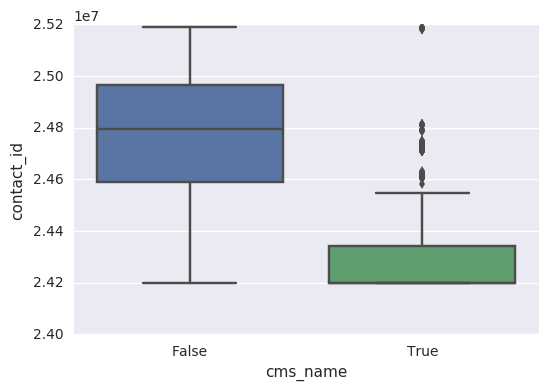

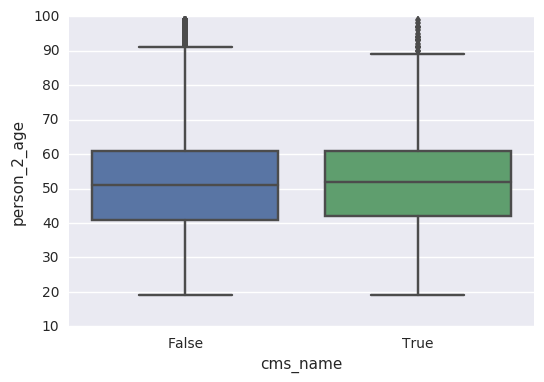

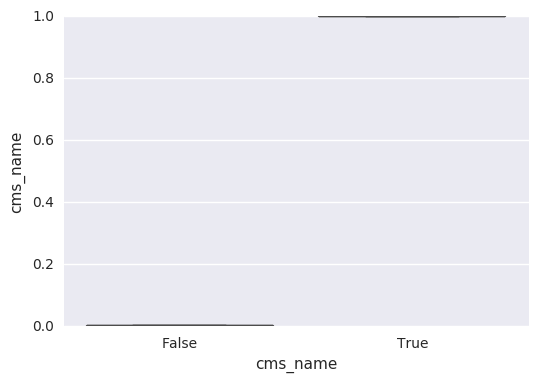

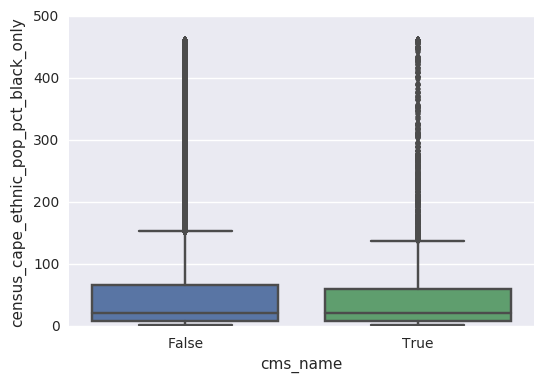

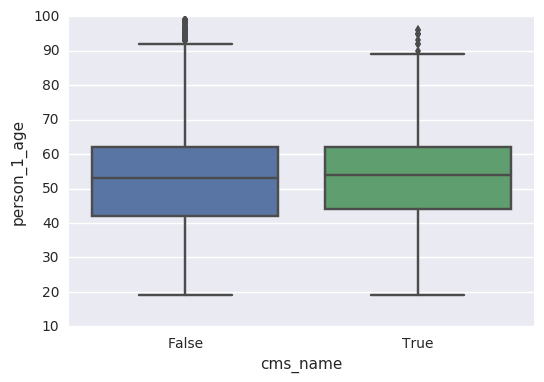

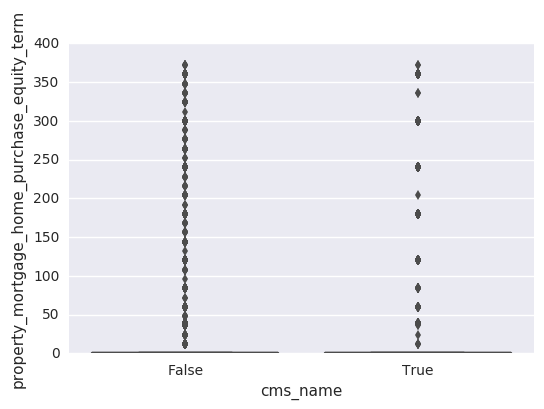

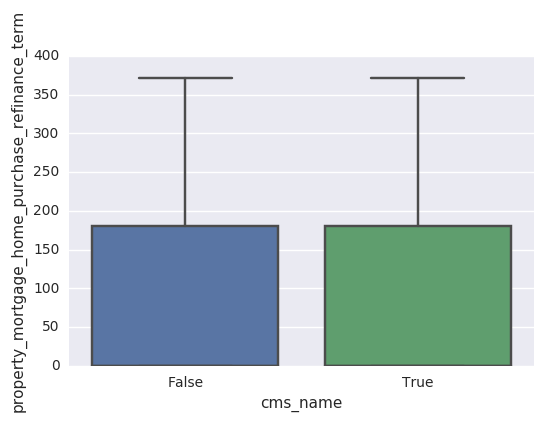

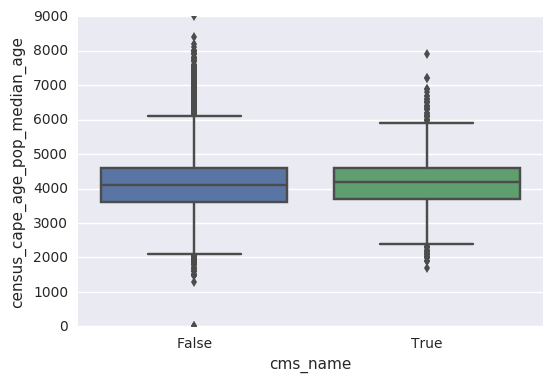

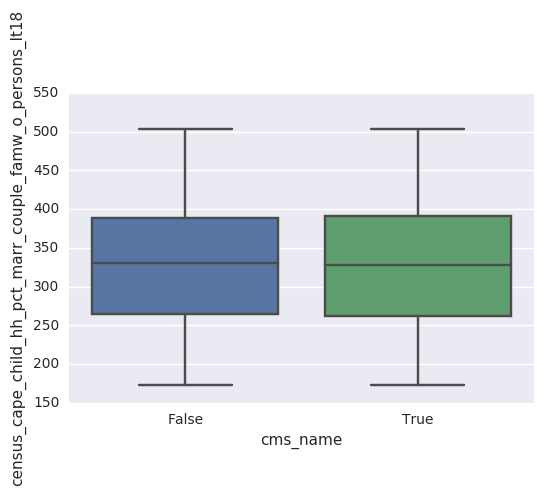

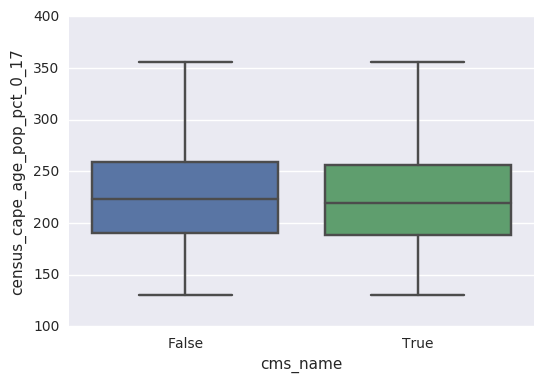

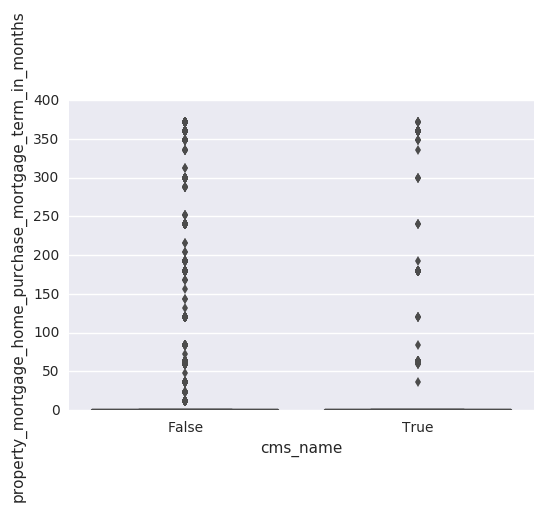

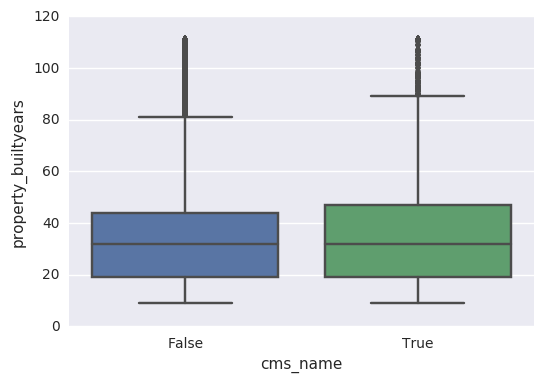

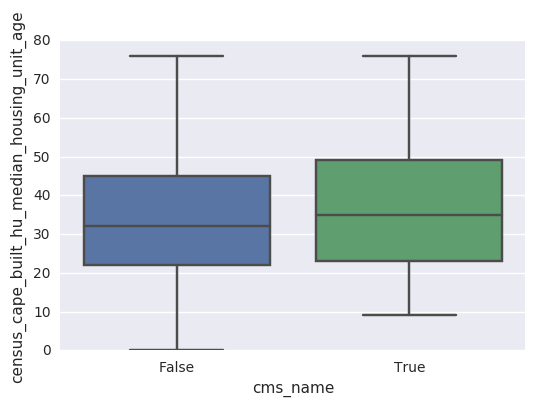

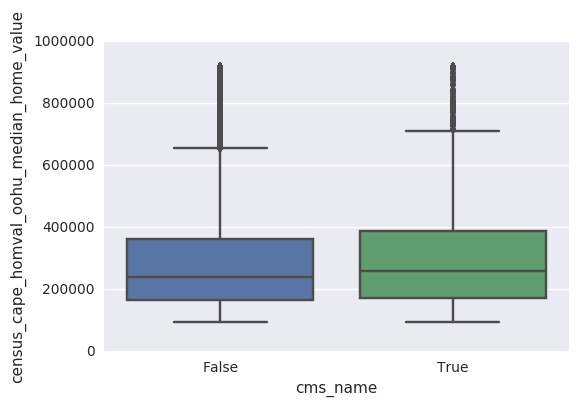

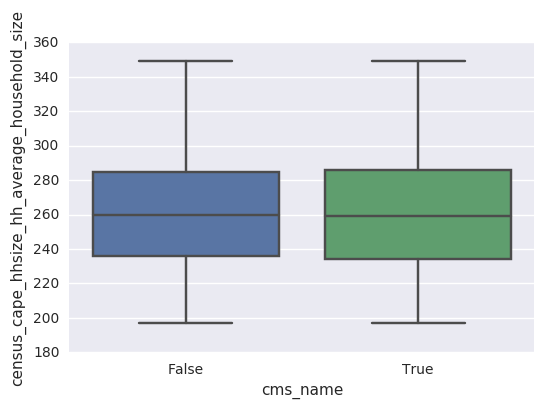

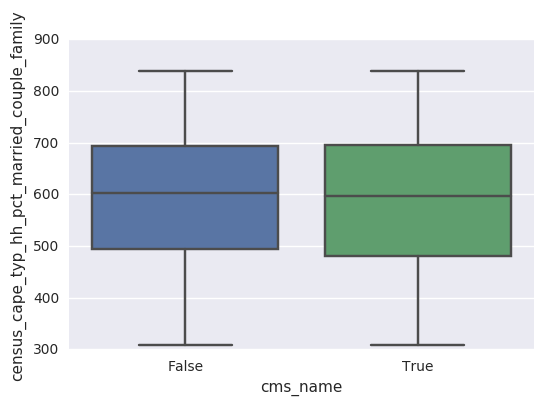

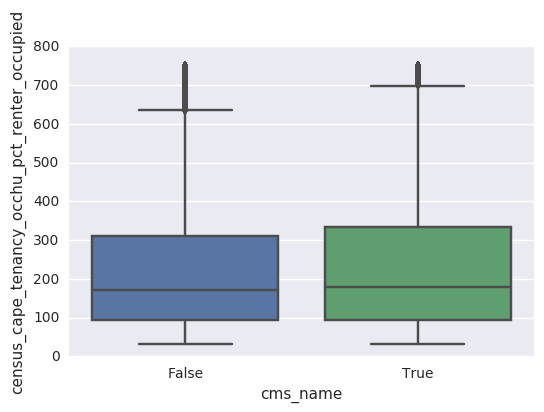

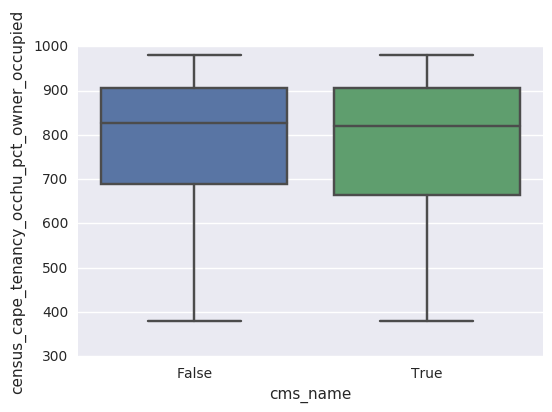

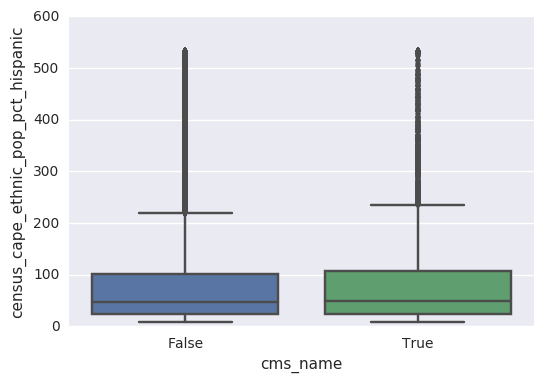

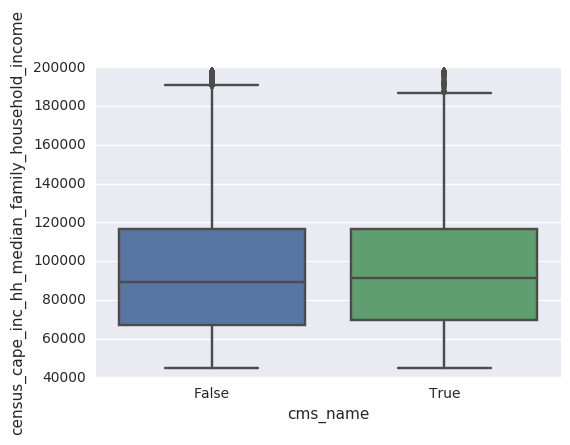

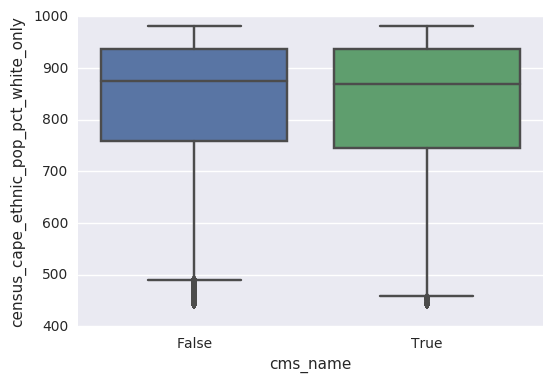

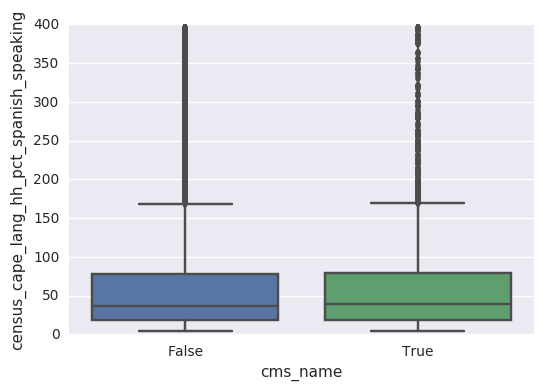

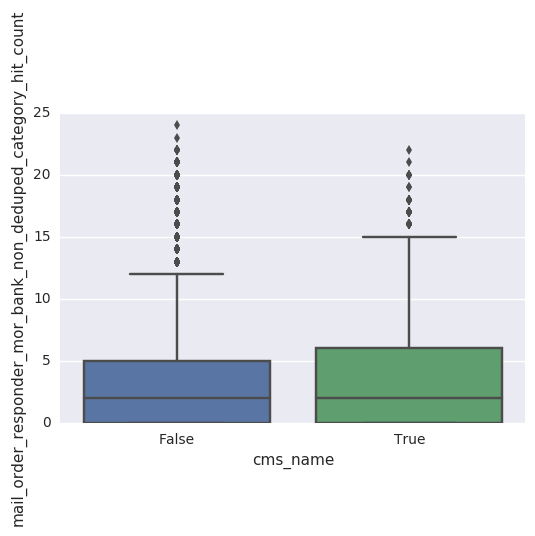

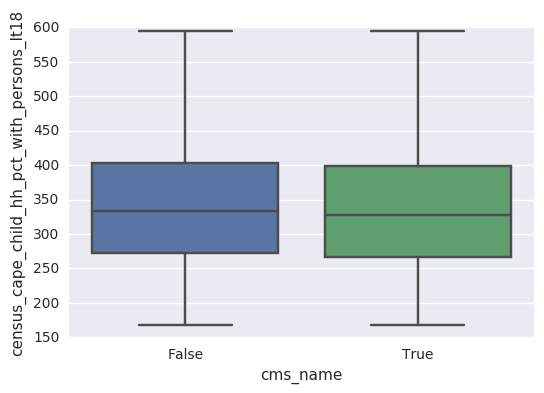

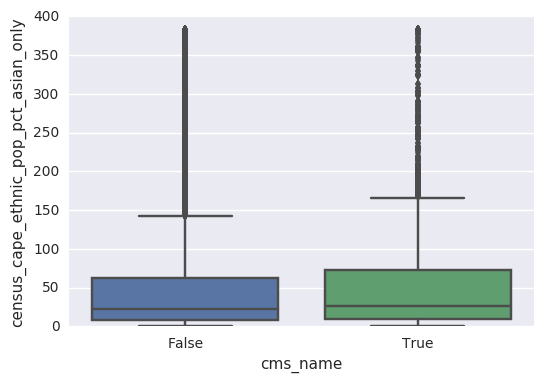

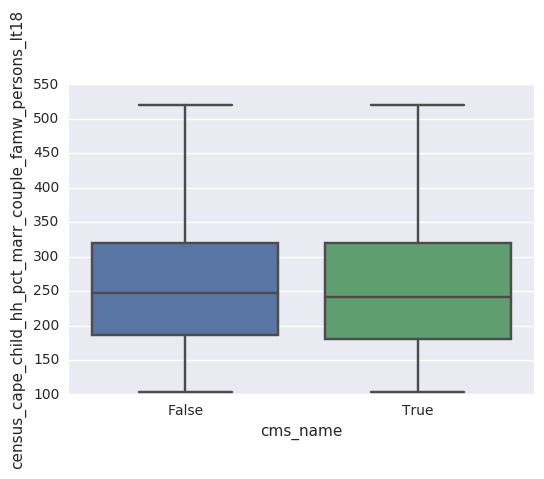

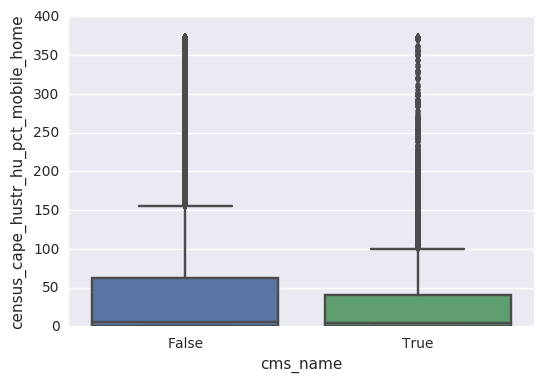

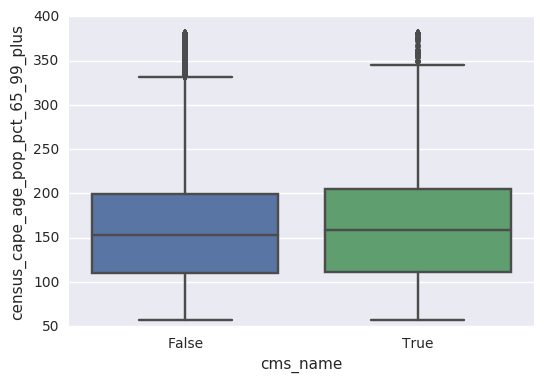

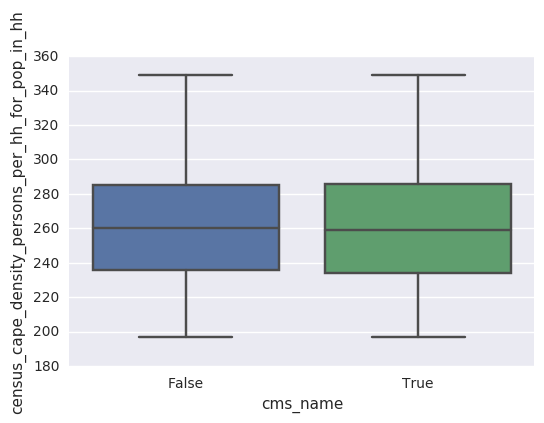

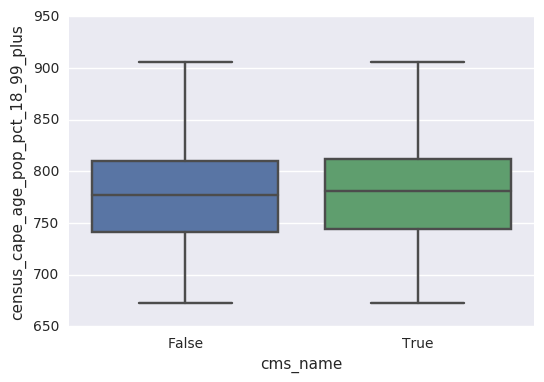

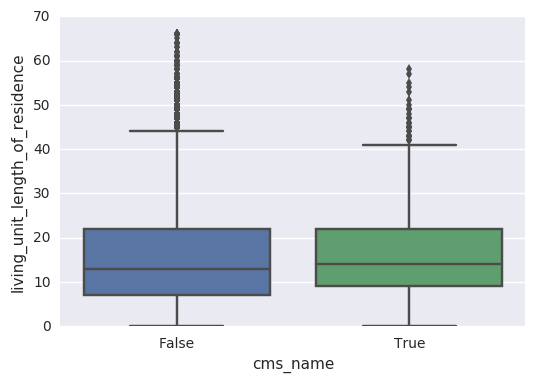

In [200]:
for i in [i for i in semf.columns if semf[i].dtype != object]:
    plt.figure()
    sns.boxplot(x='cms_name',y=i,data=semf)

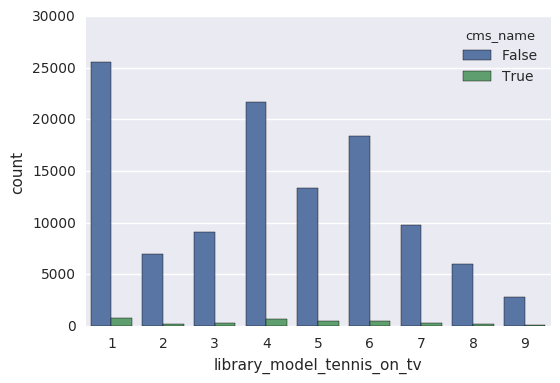

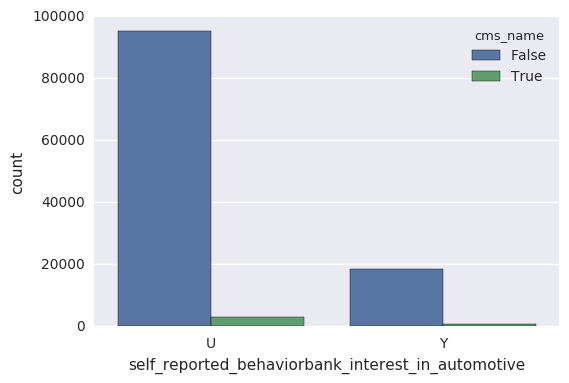

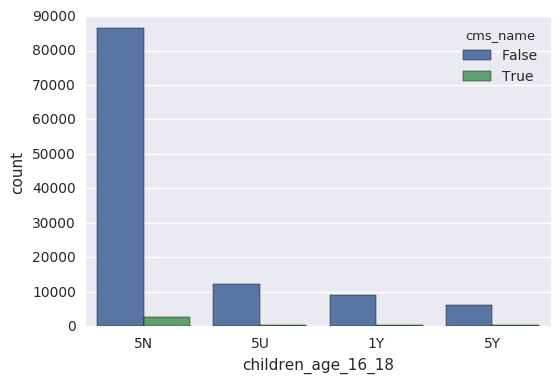

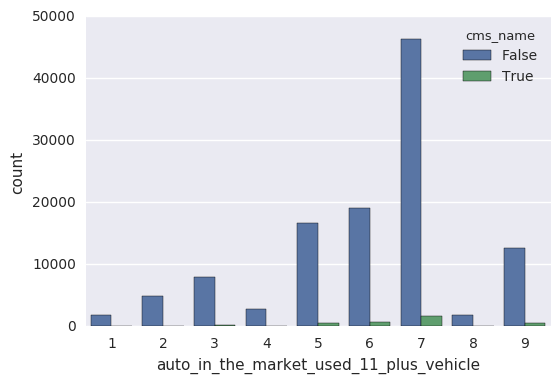

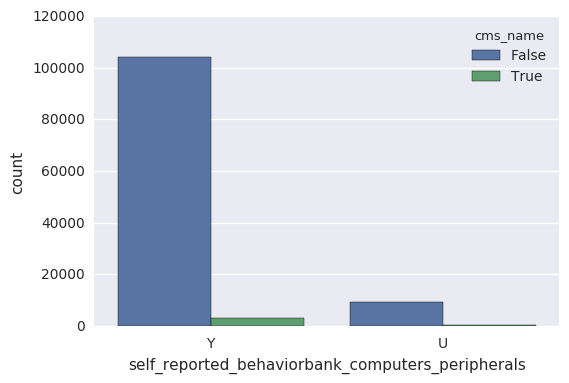

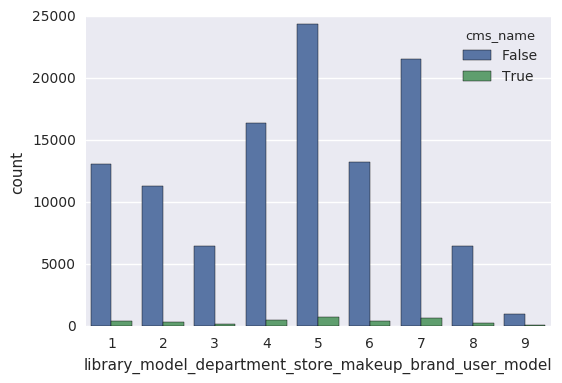

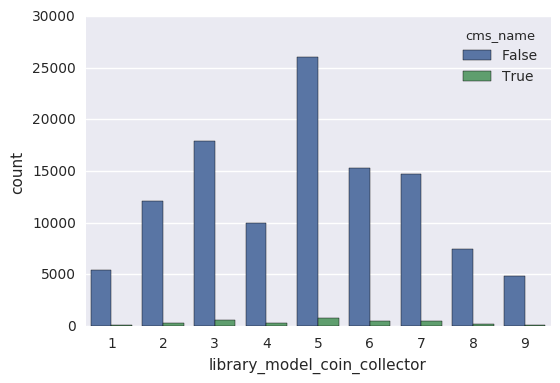

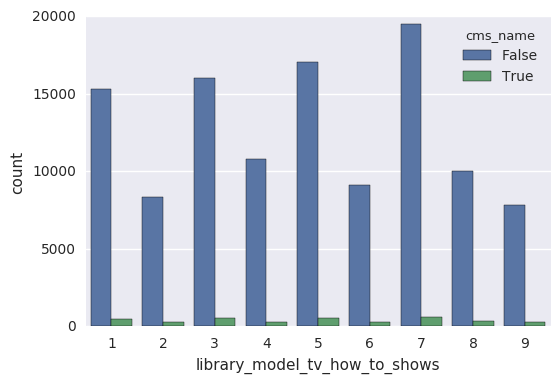

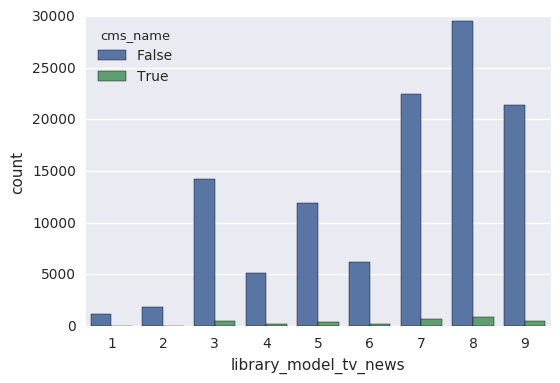

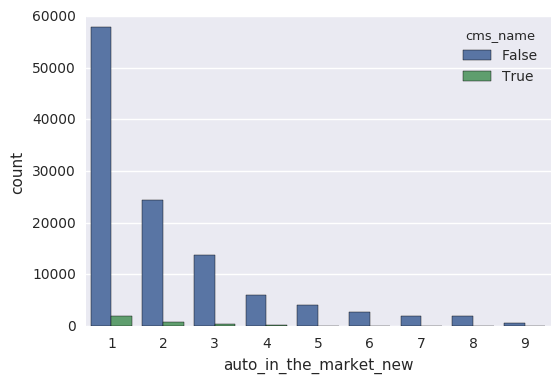

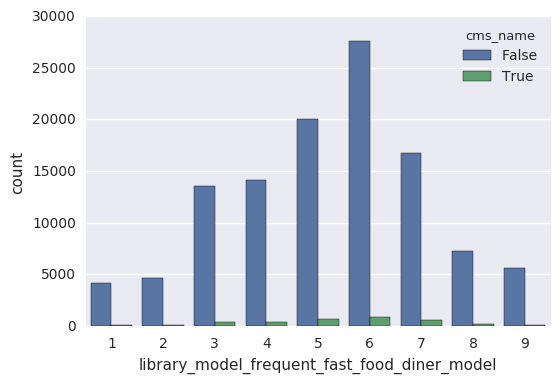

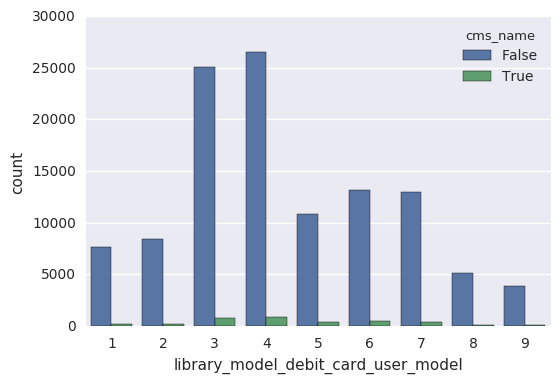

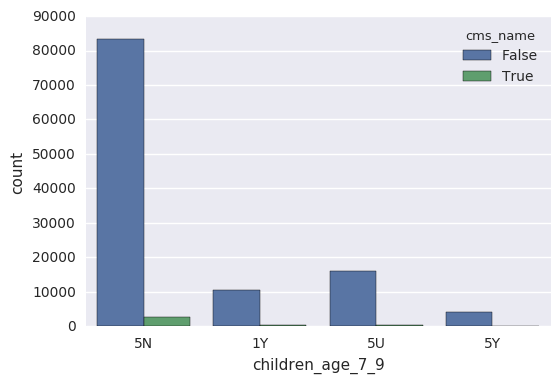

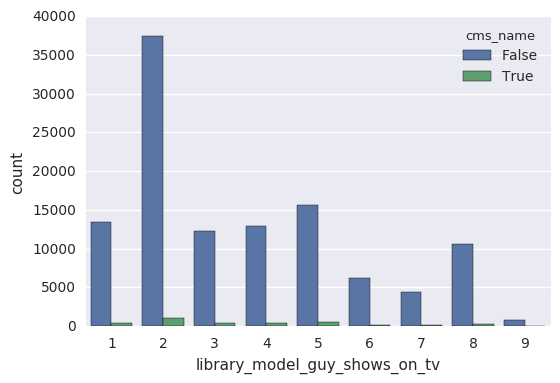

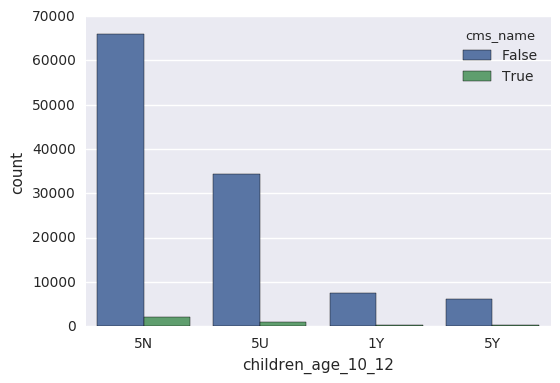

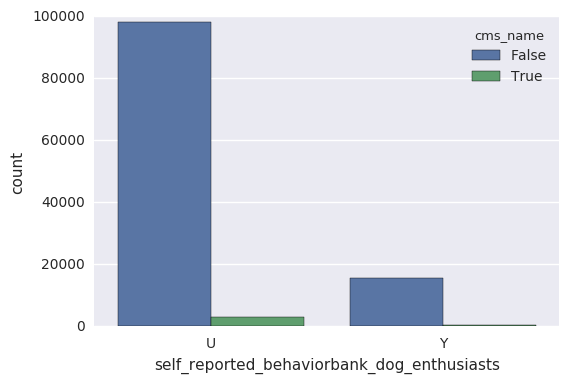

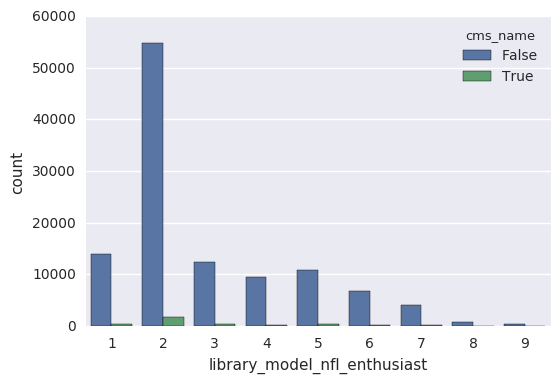

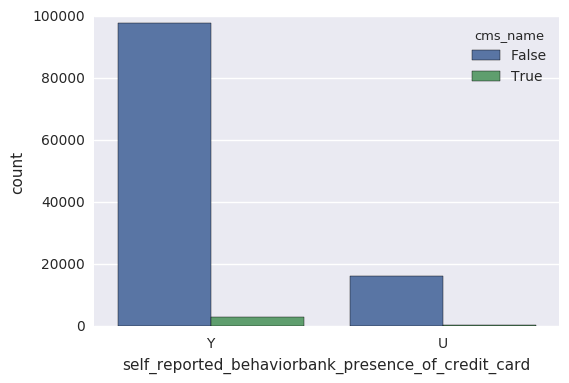

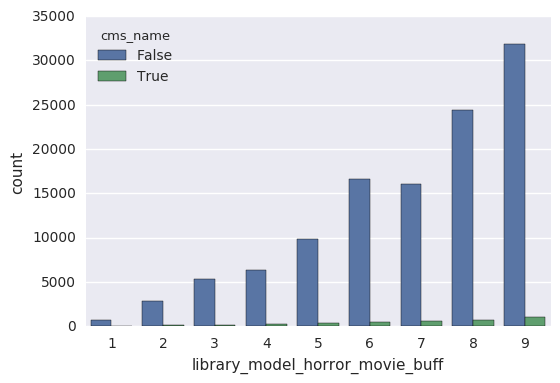

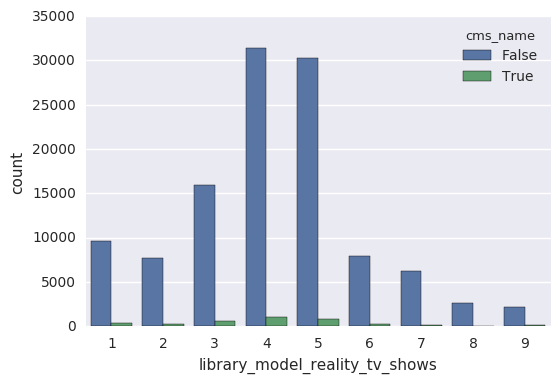

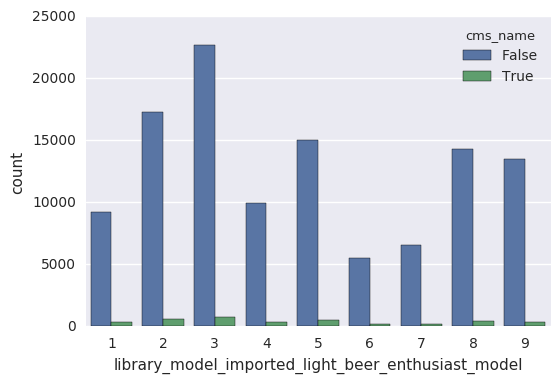

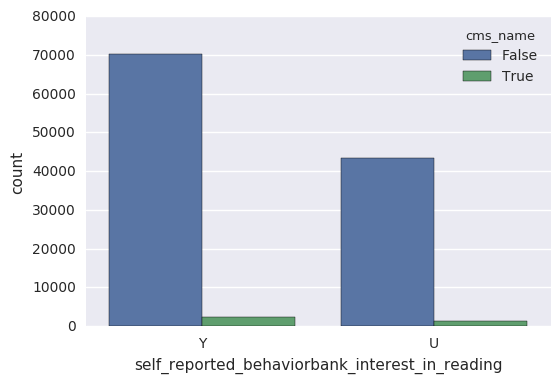

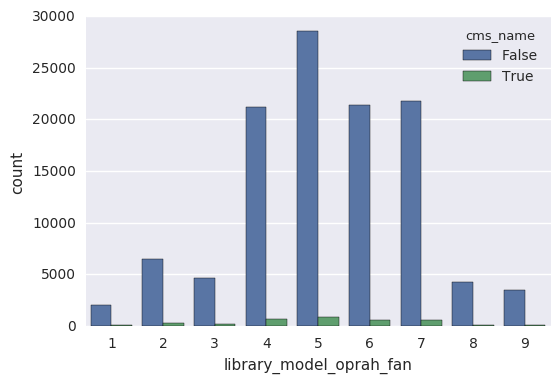

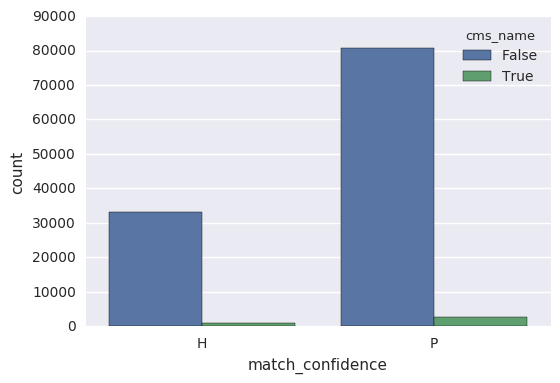

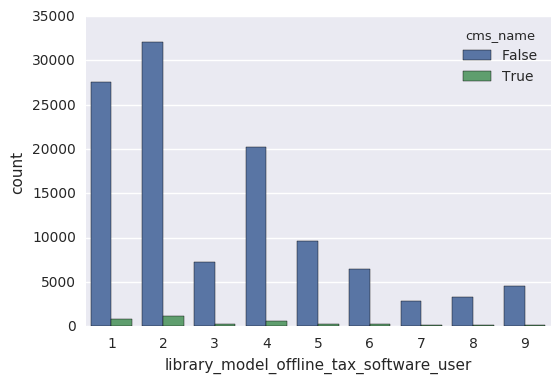

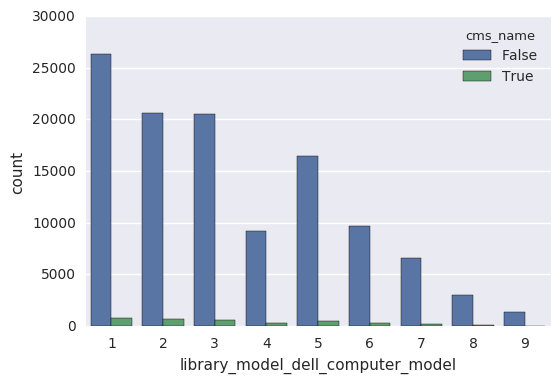

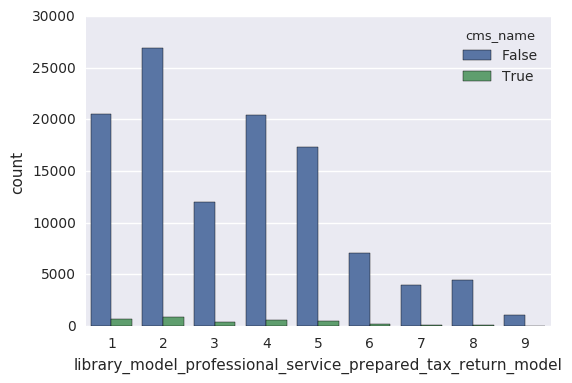

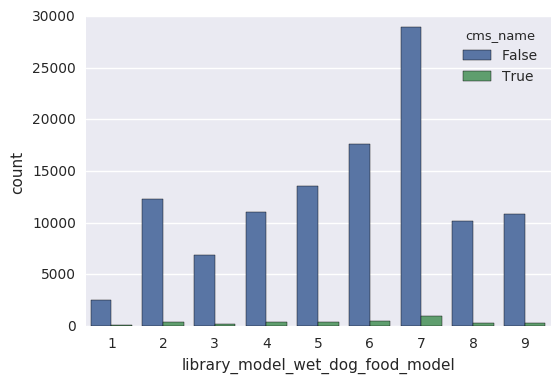

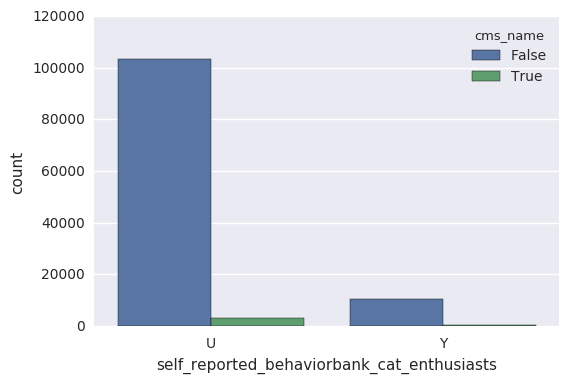

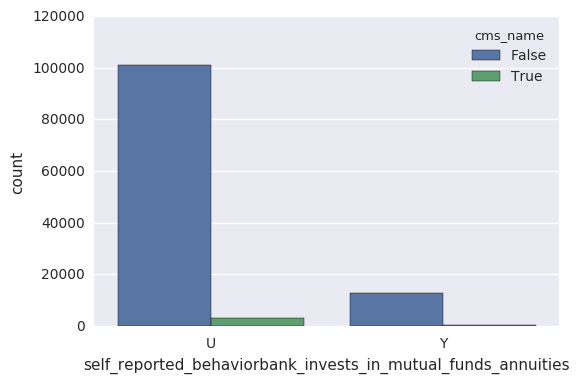

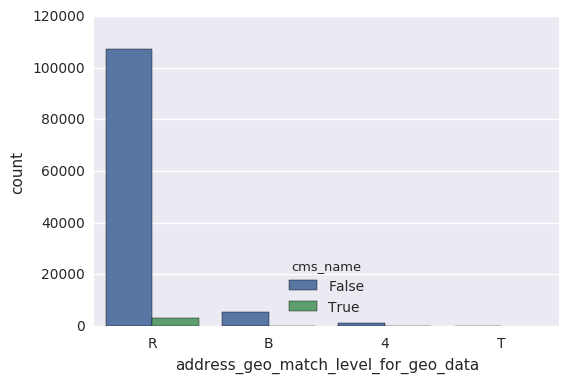

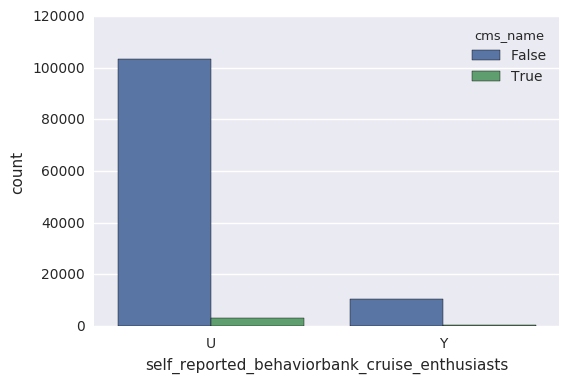

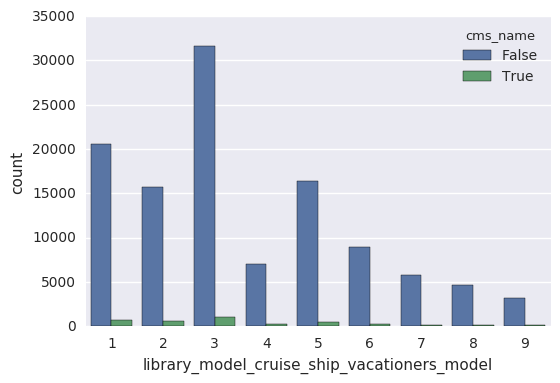

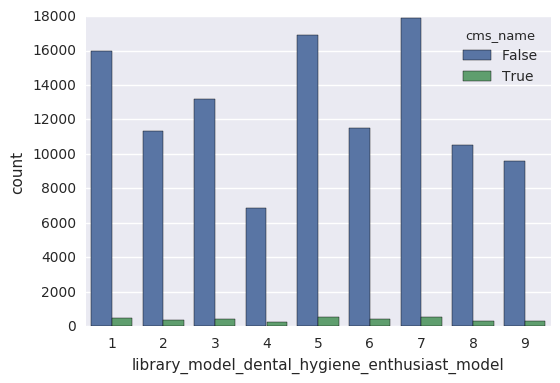

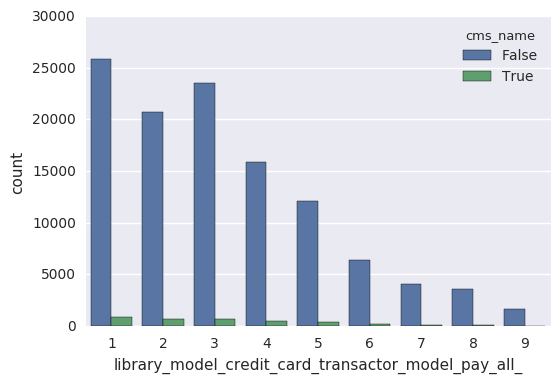

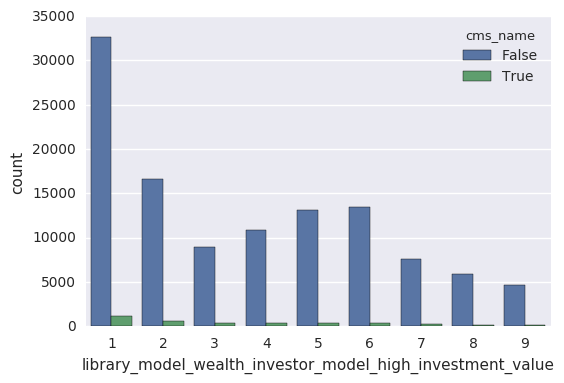

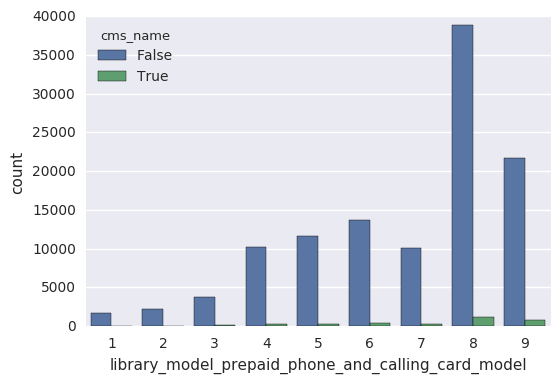

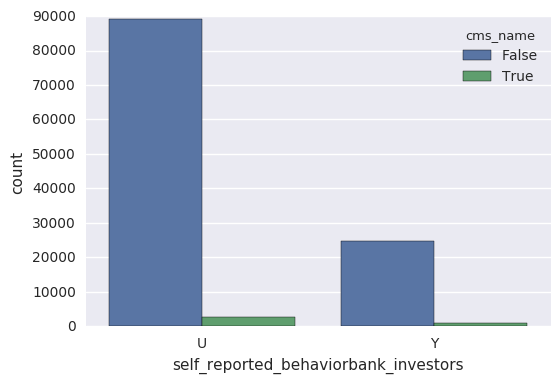

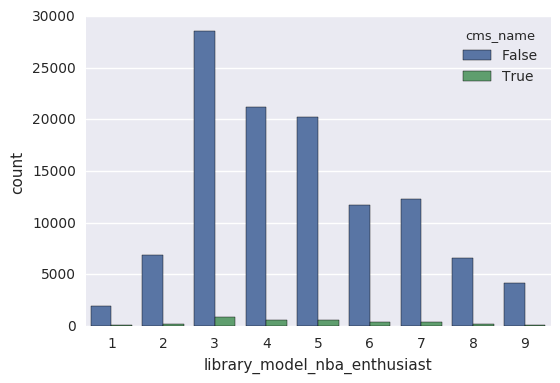

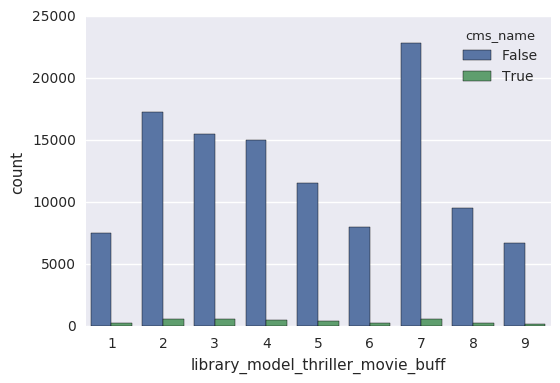

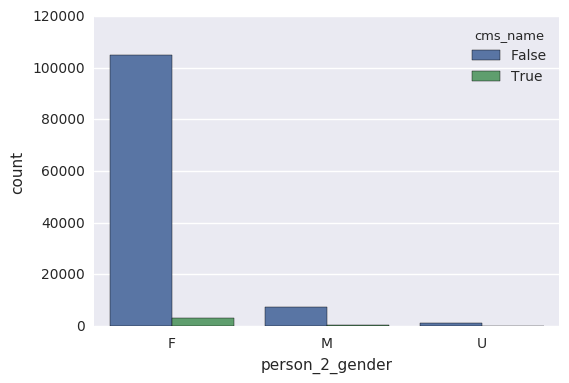

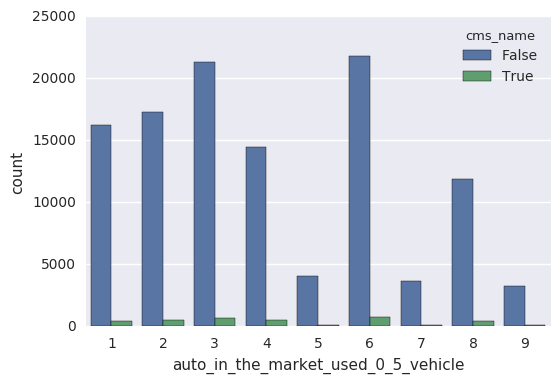

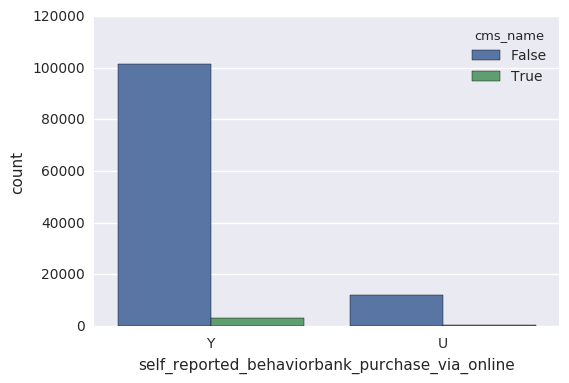

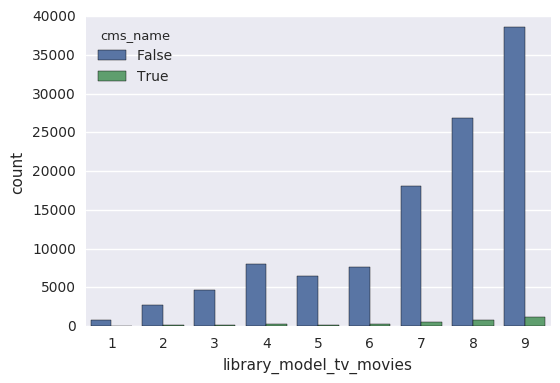

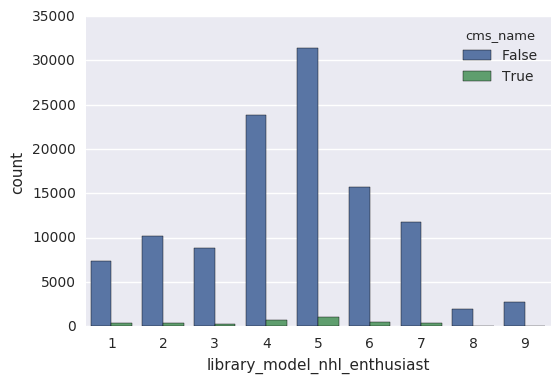

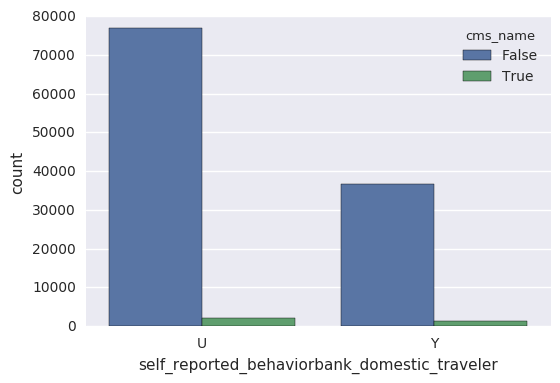

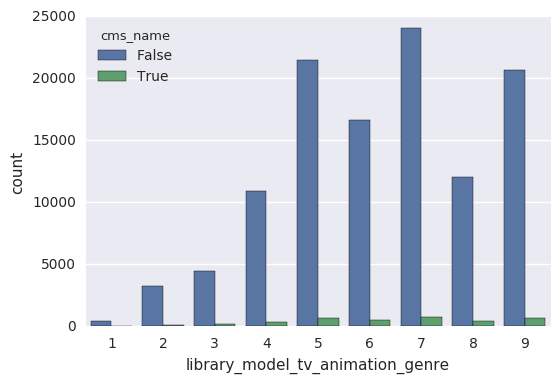

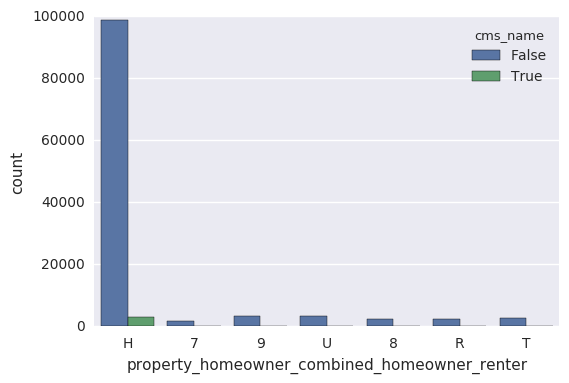

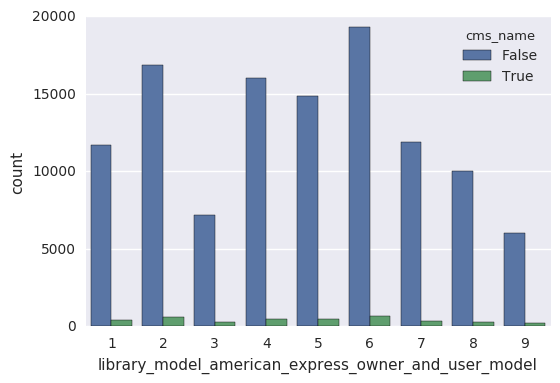

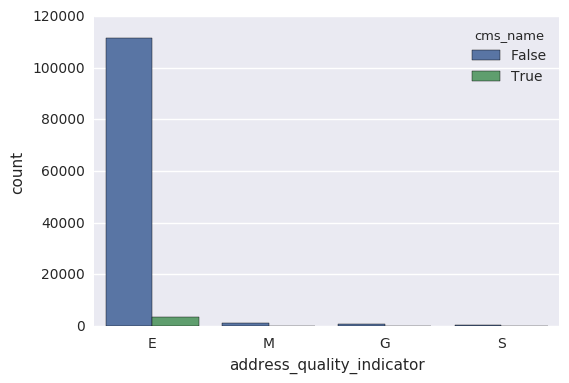

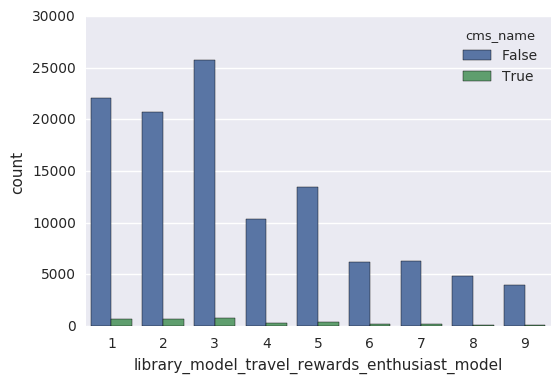

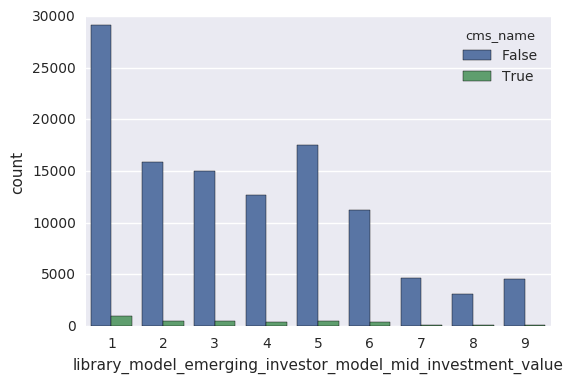

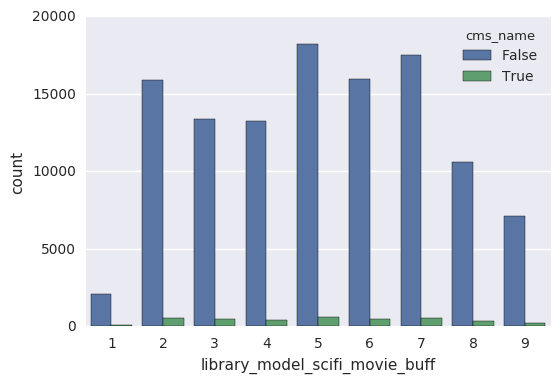

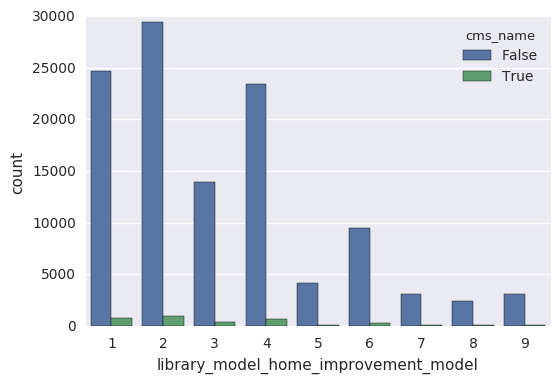

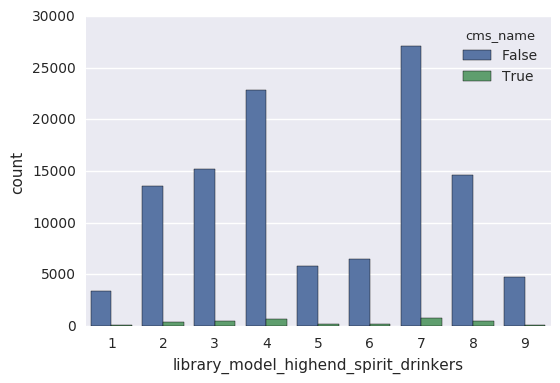

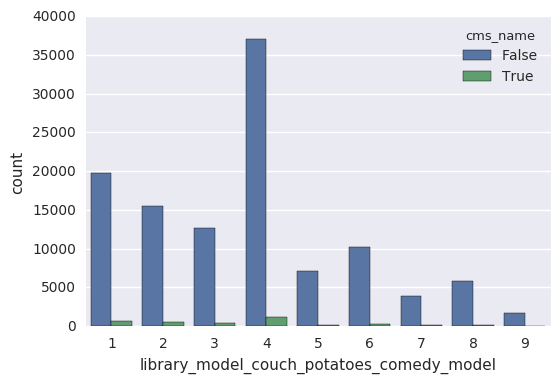

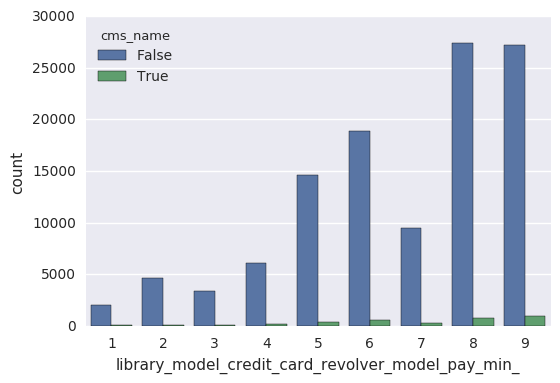

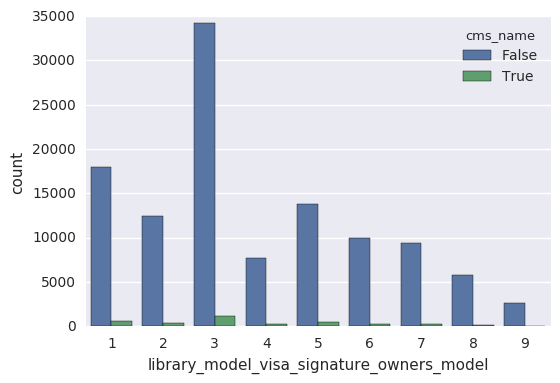

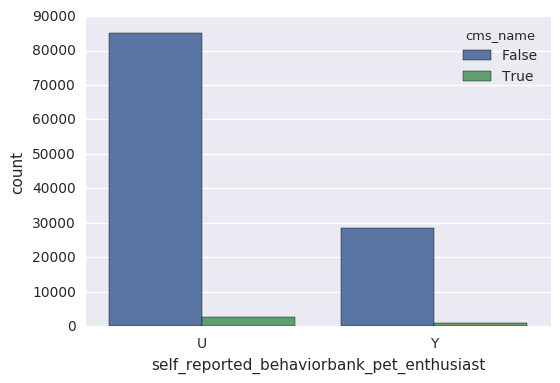

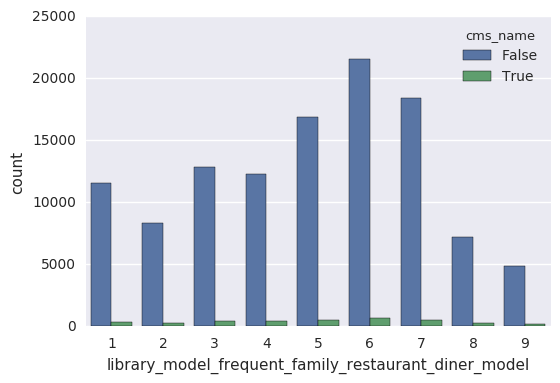

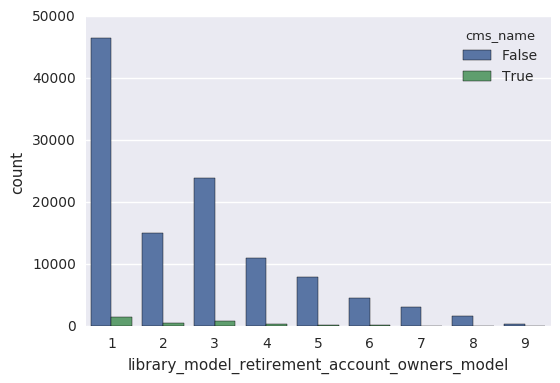

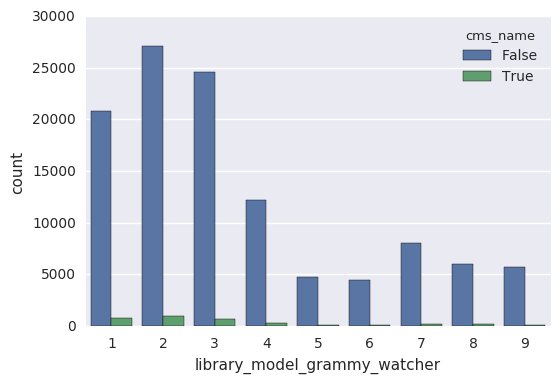

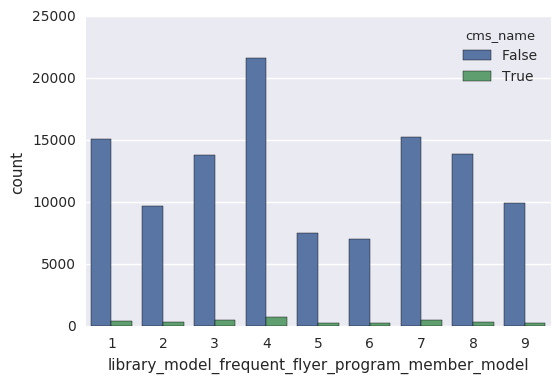

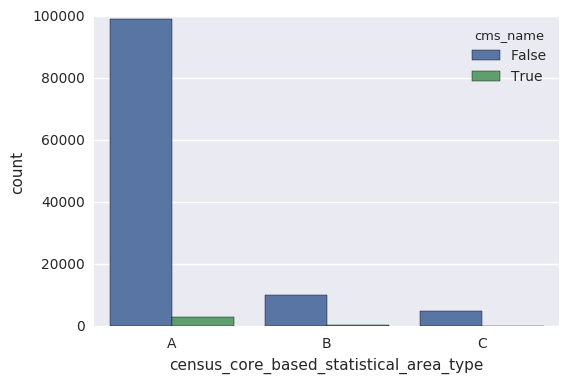

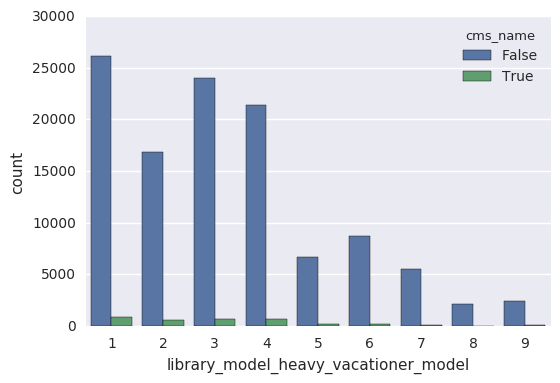

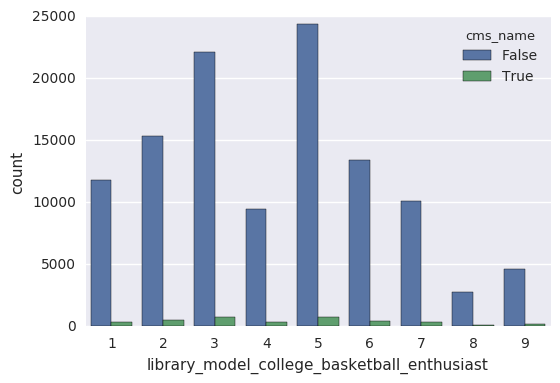

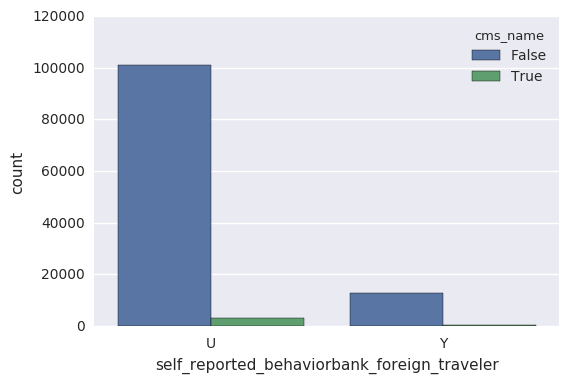

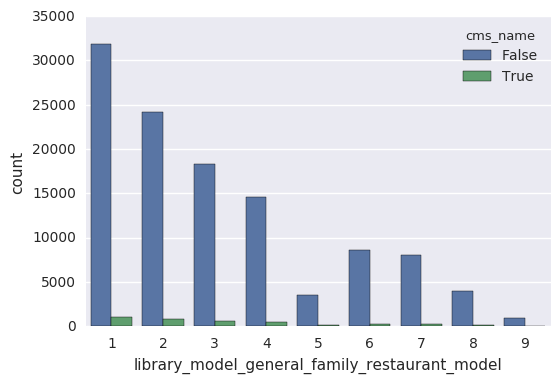

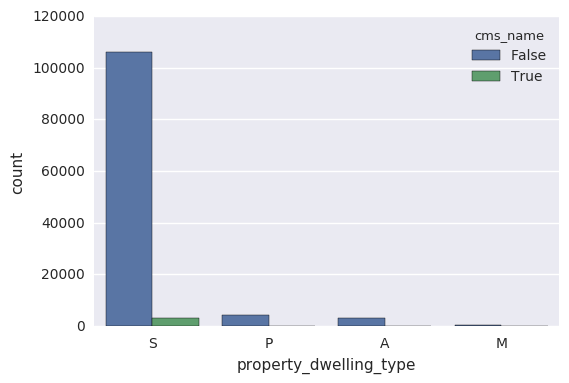

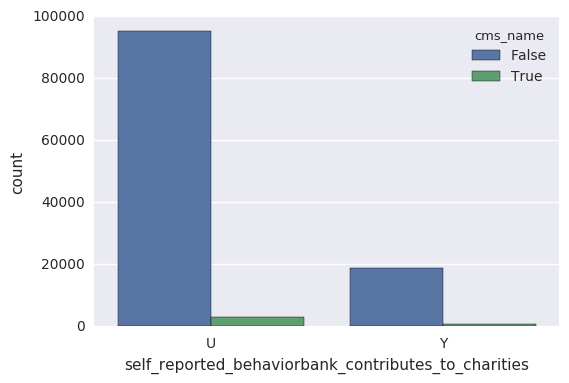

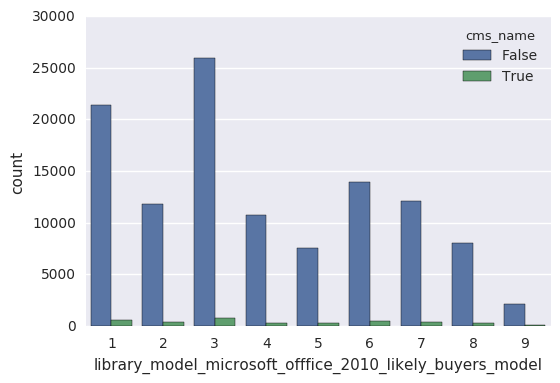

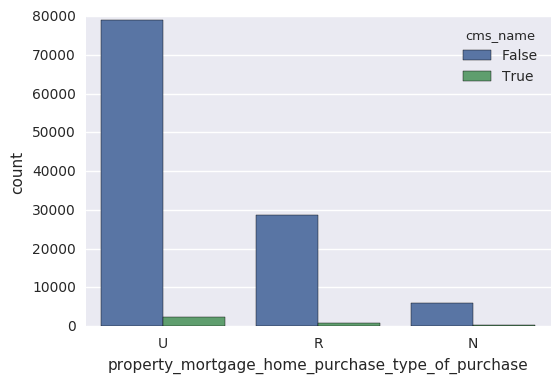

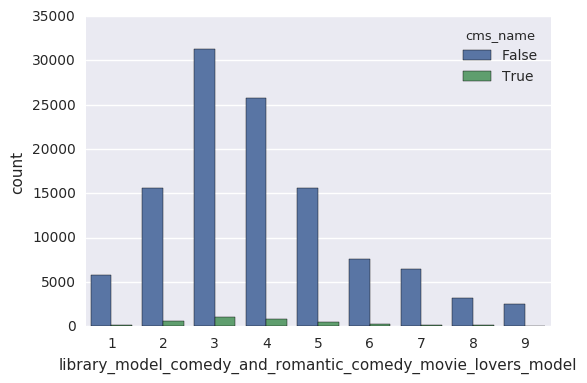

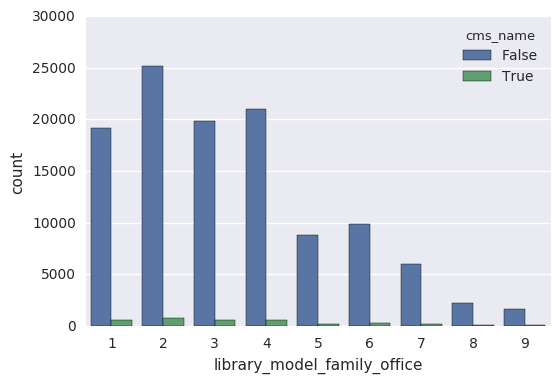

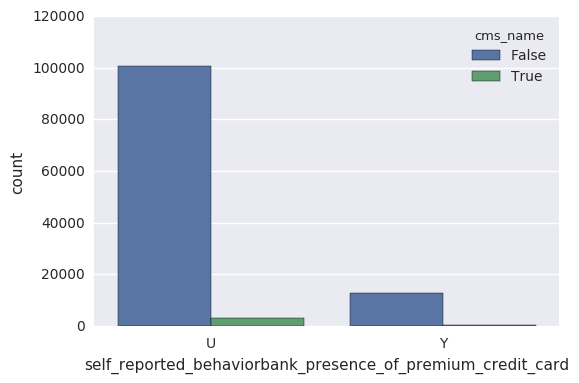

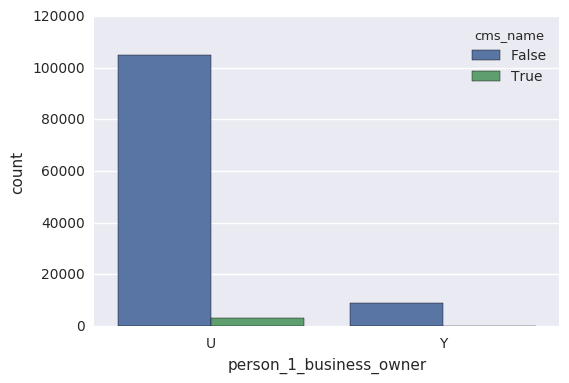

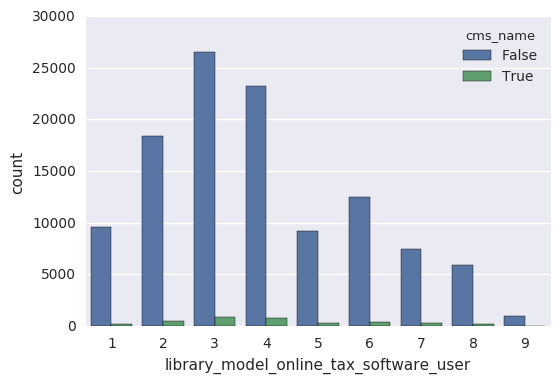

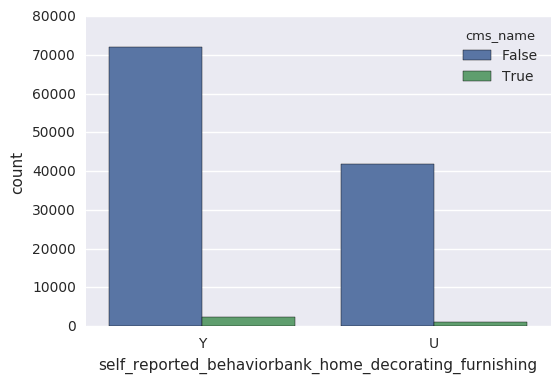

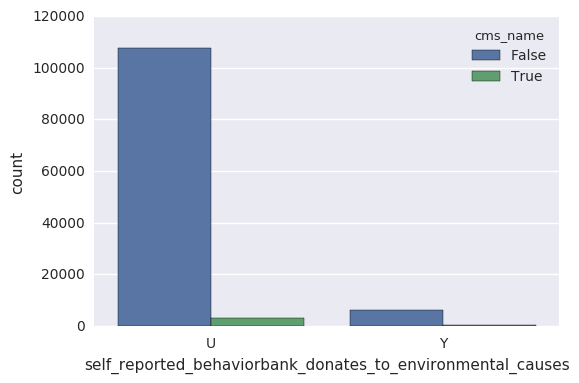

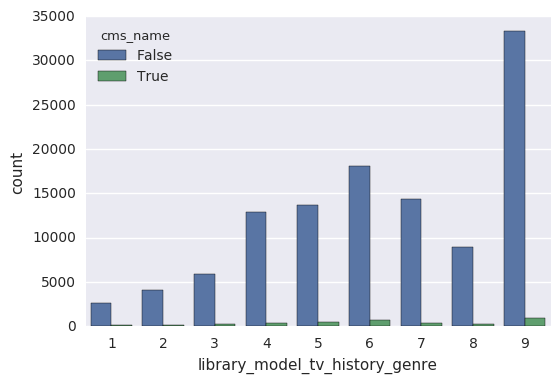

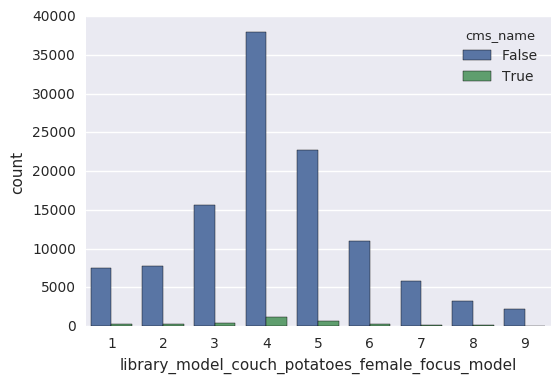

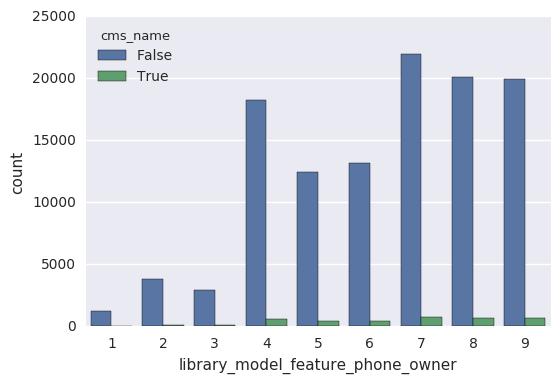

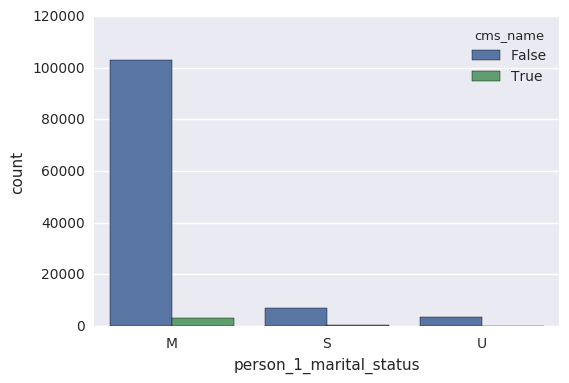

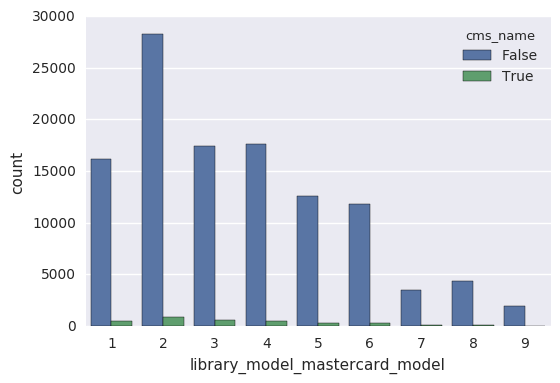

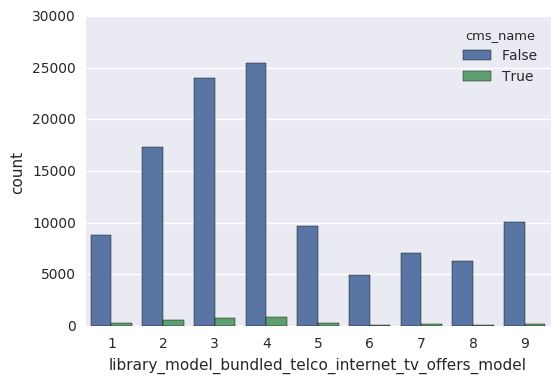

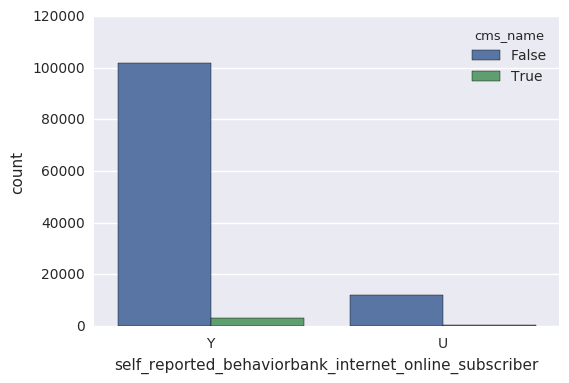

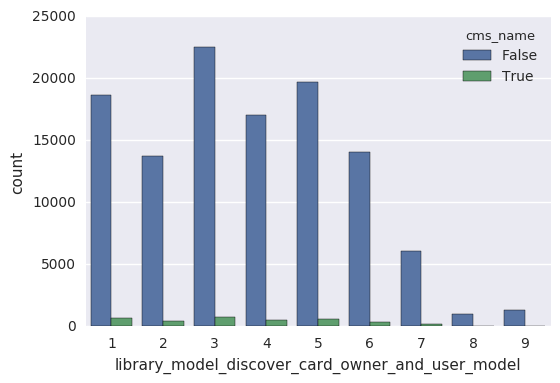

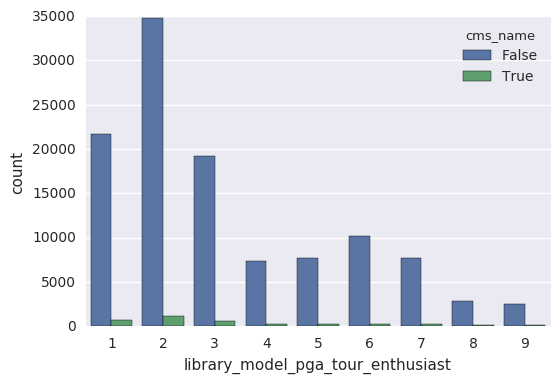

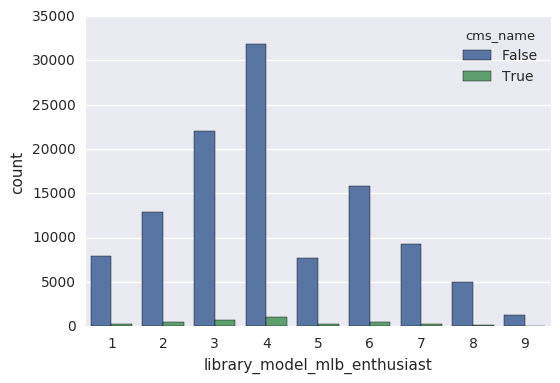

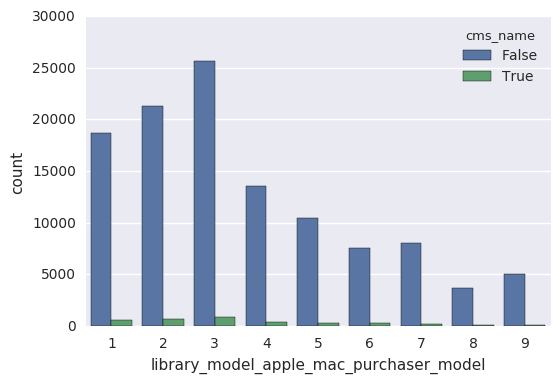

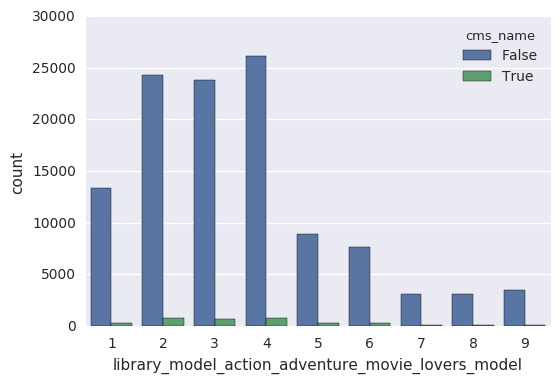

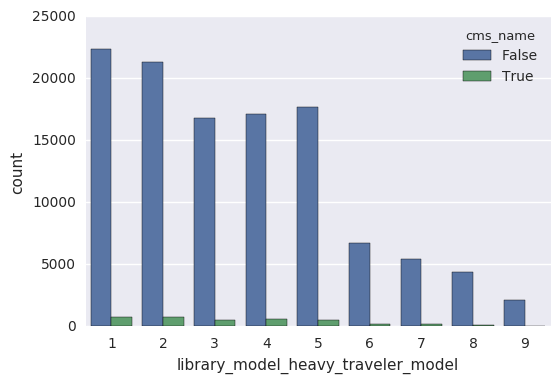

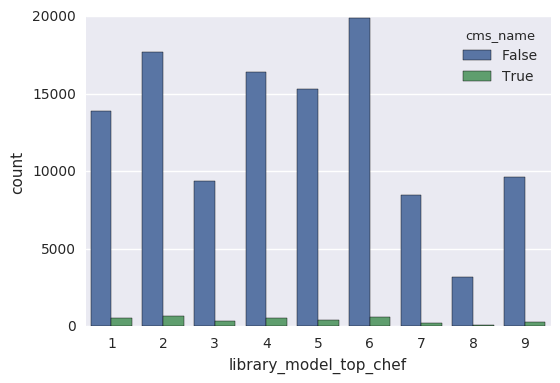

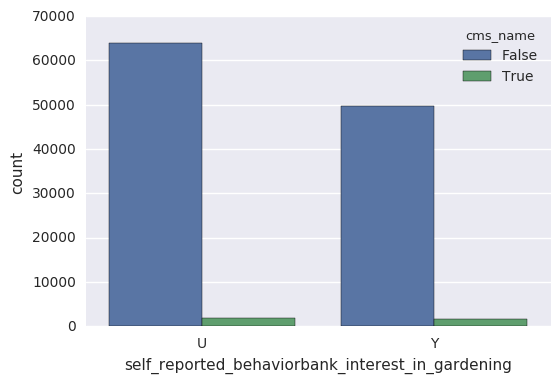

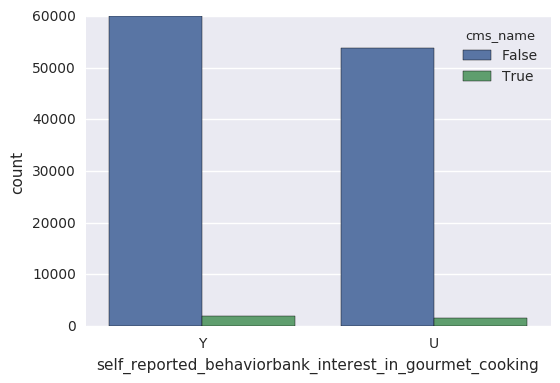

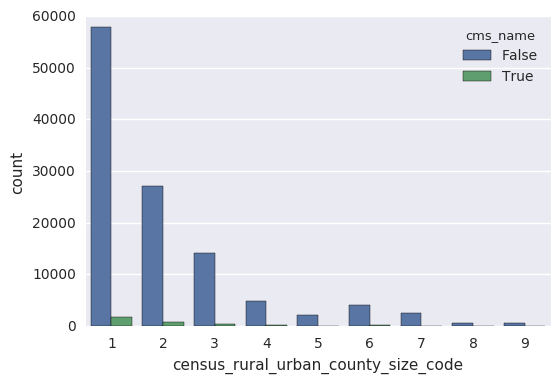

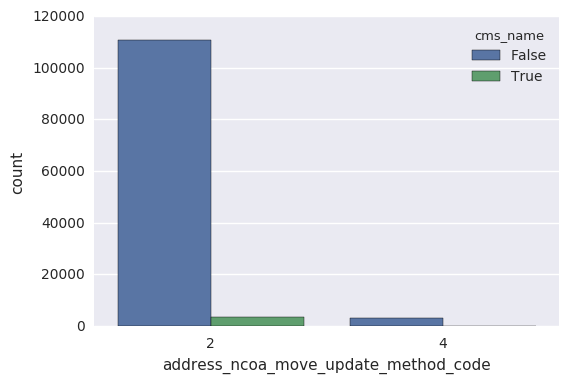

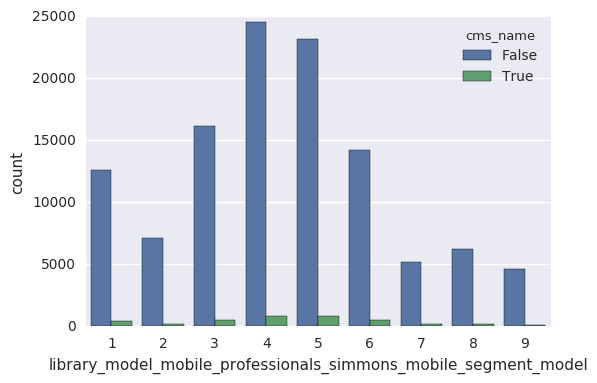

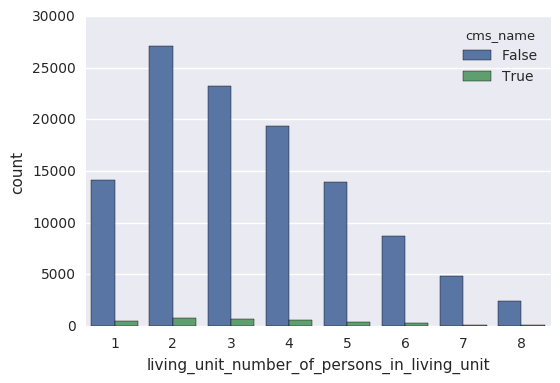

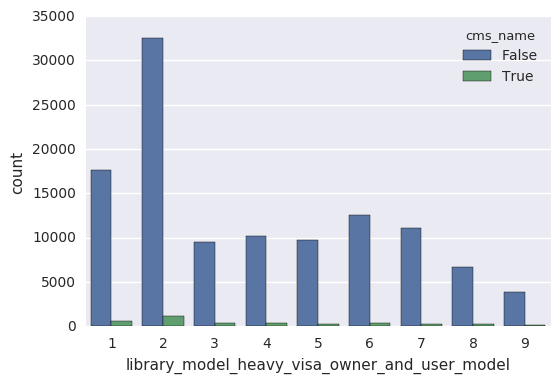

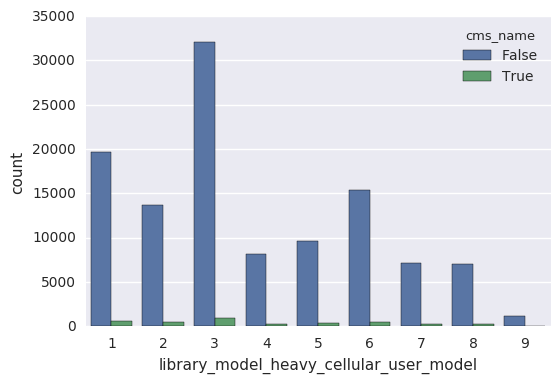

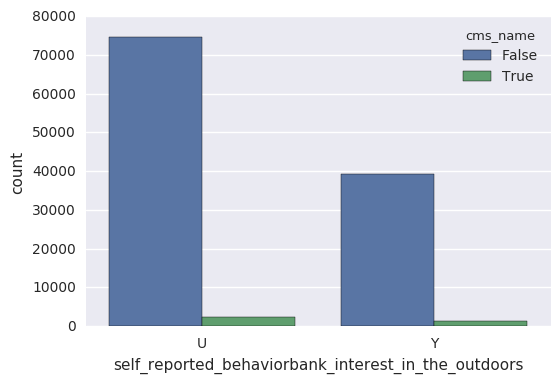

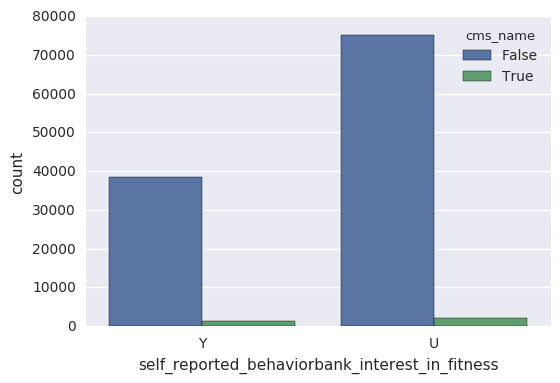

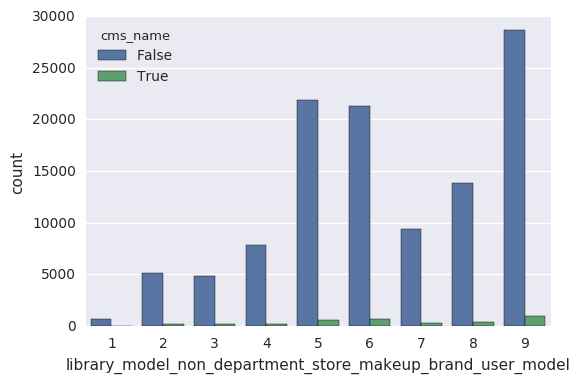

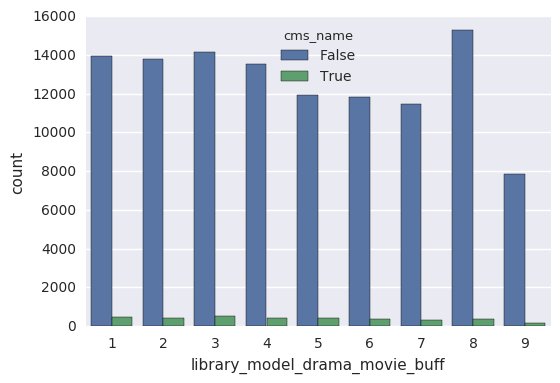

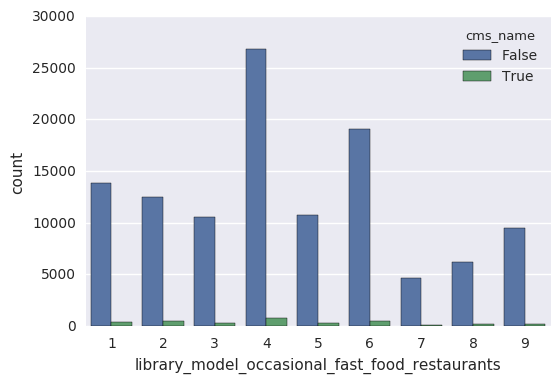

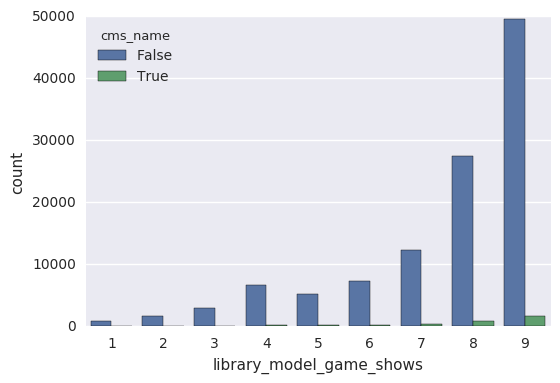

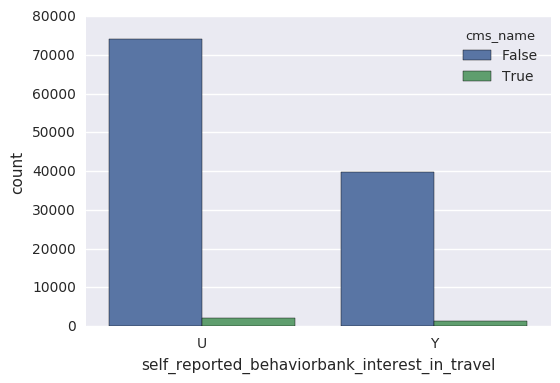

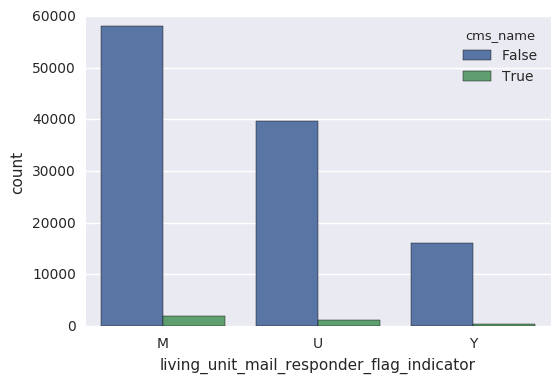

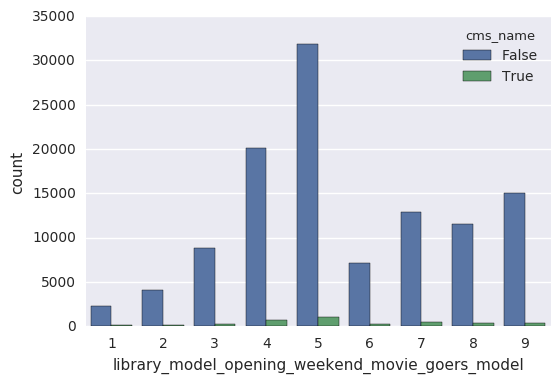

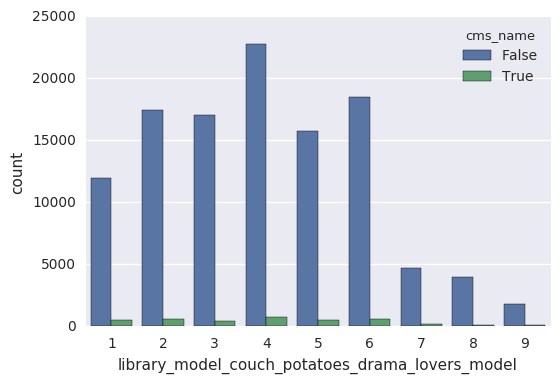

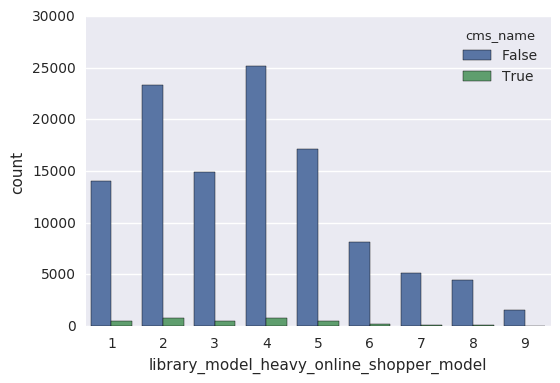

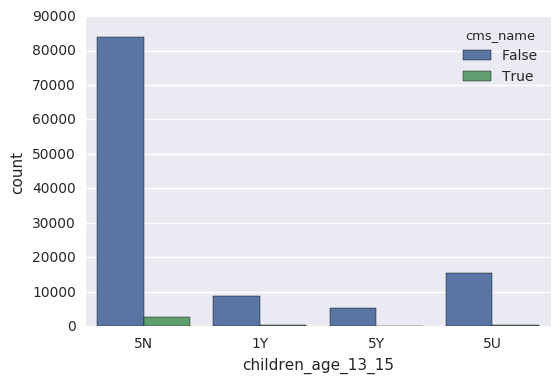

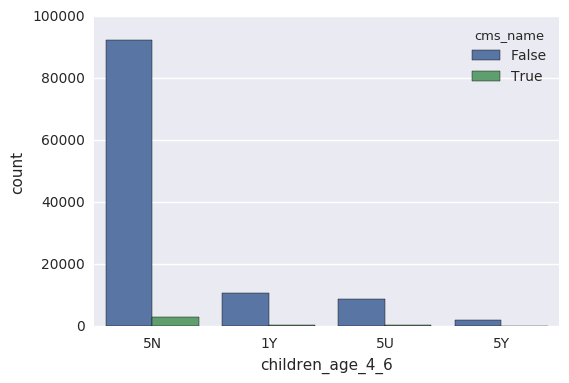

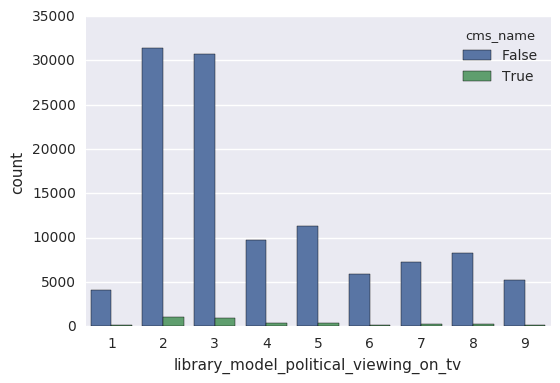

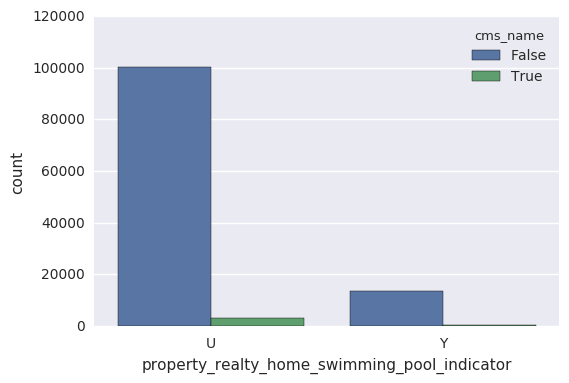

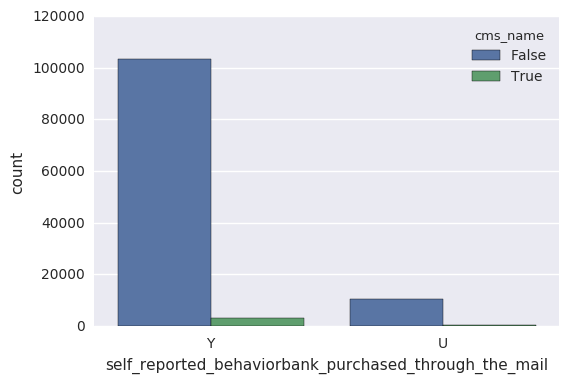

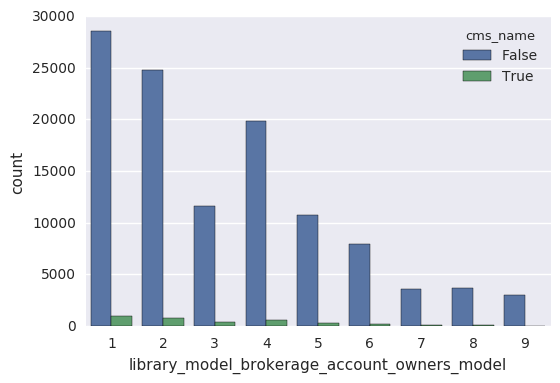

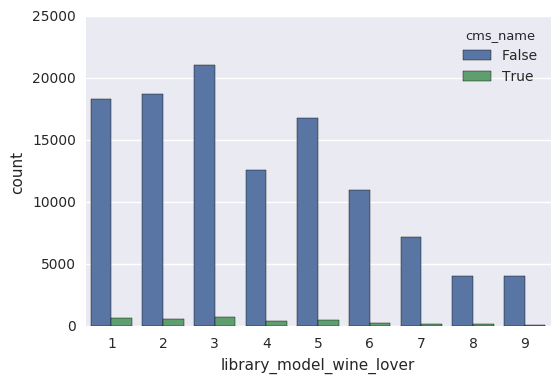

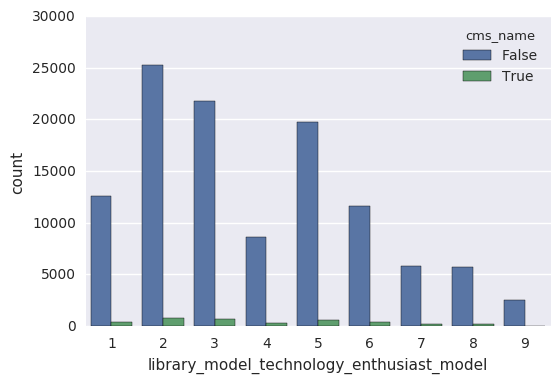

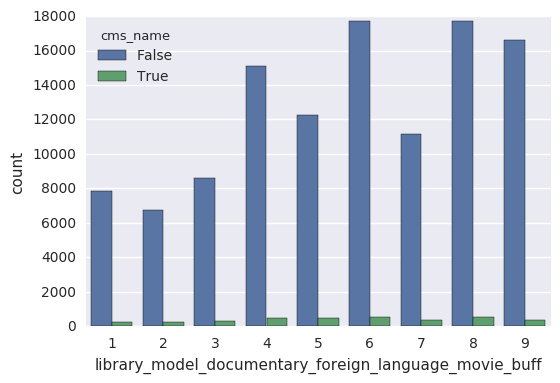

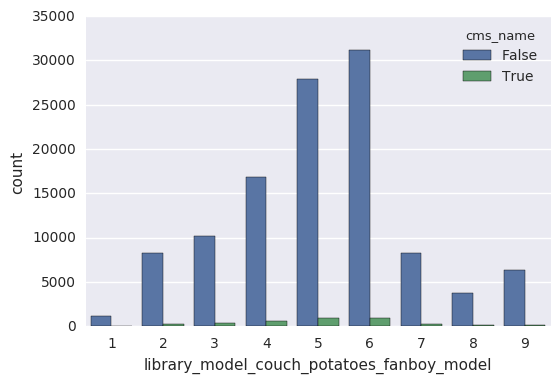

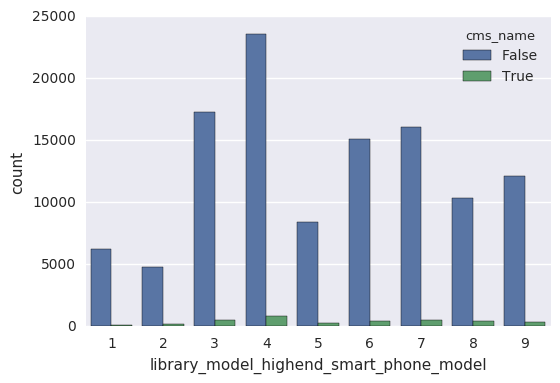

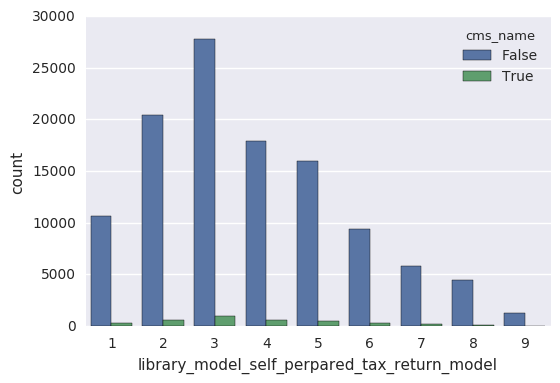

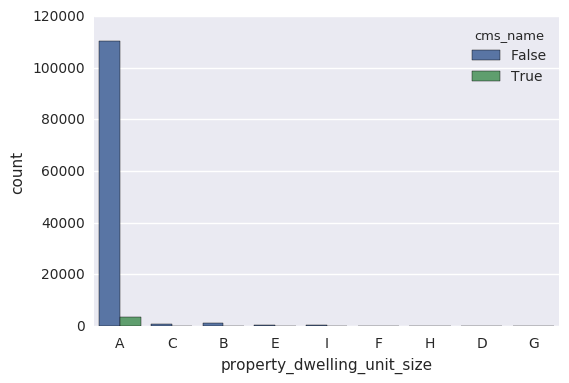

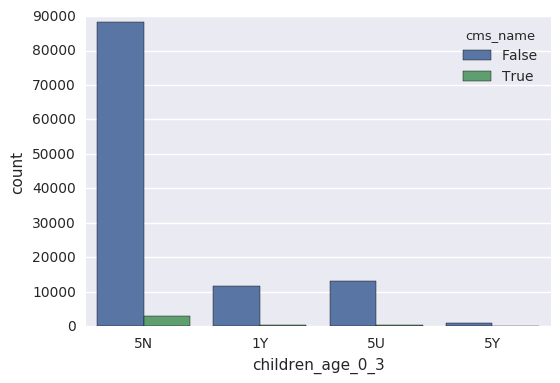

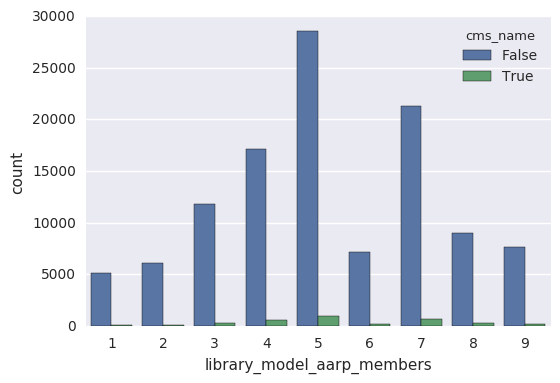

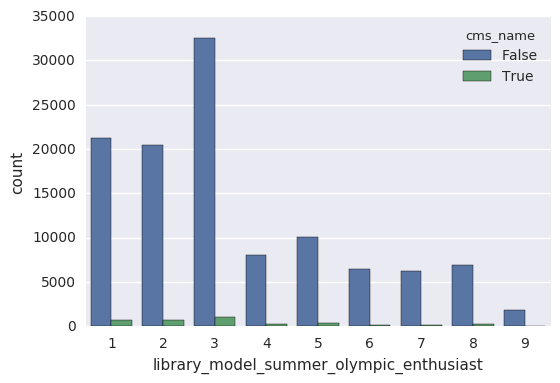

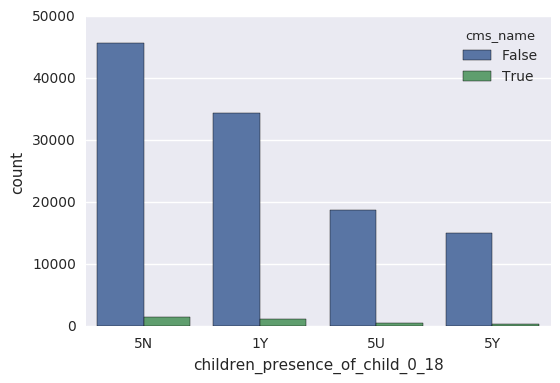

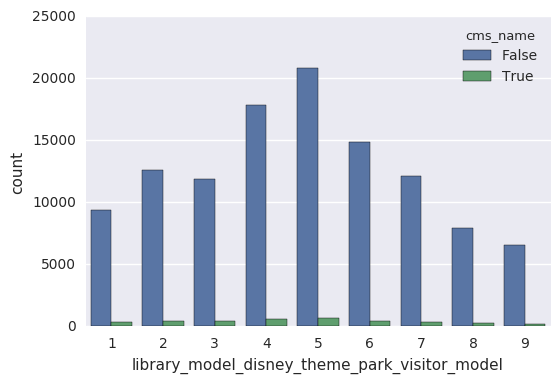

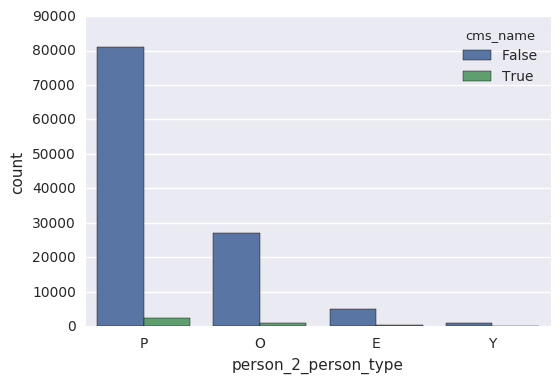

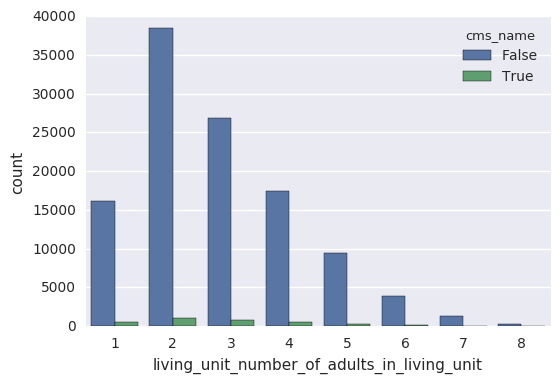

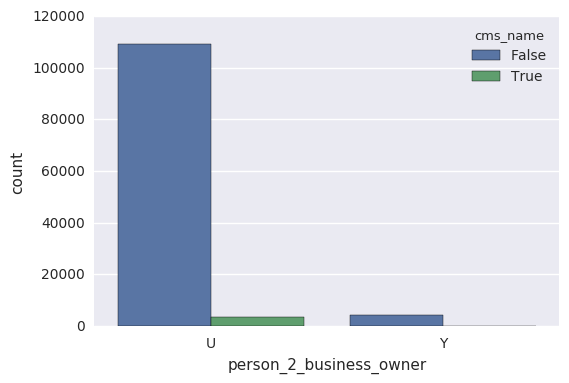

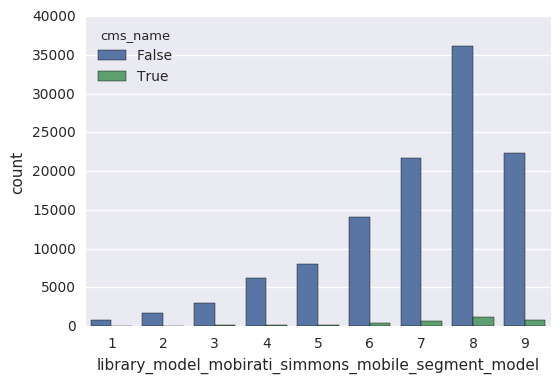

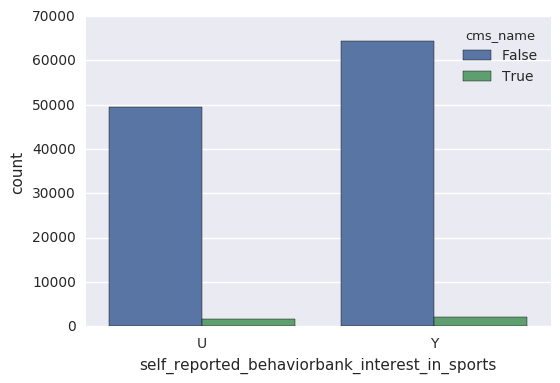

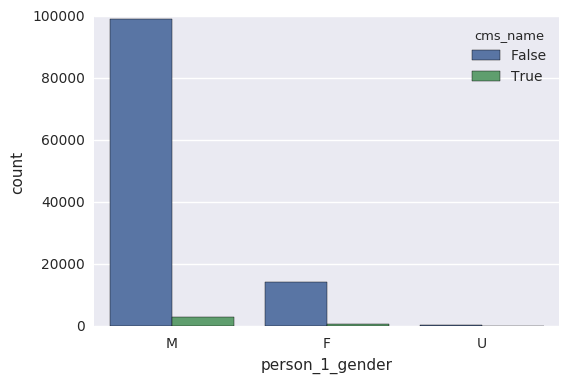

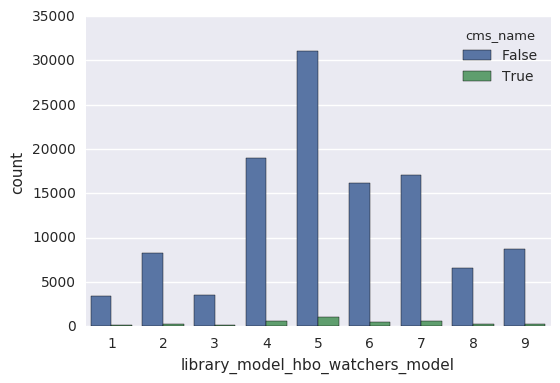

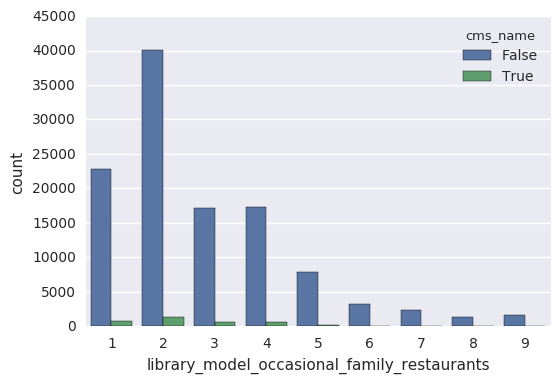

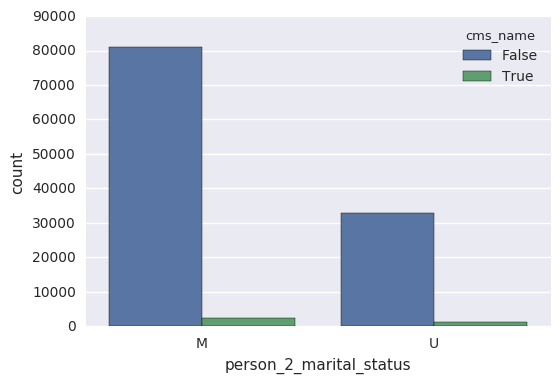

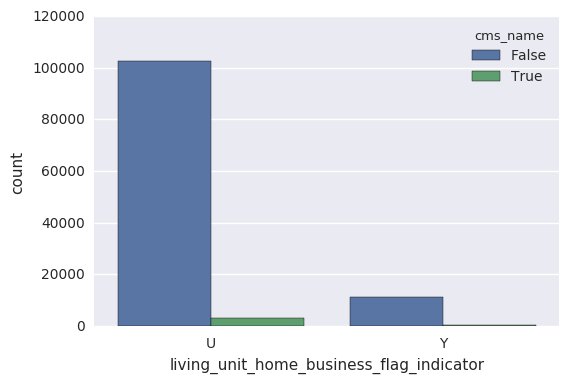

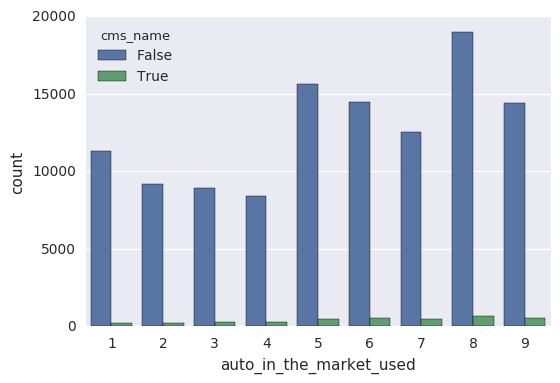

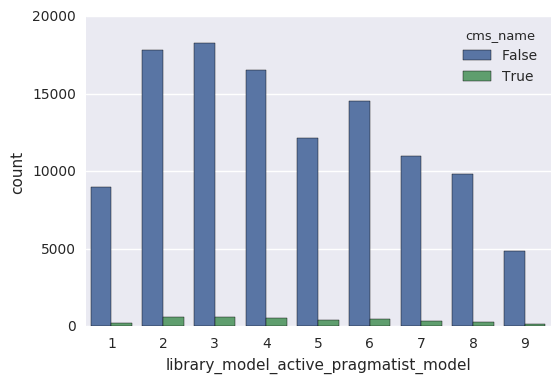

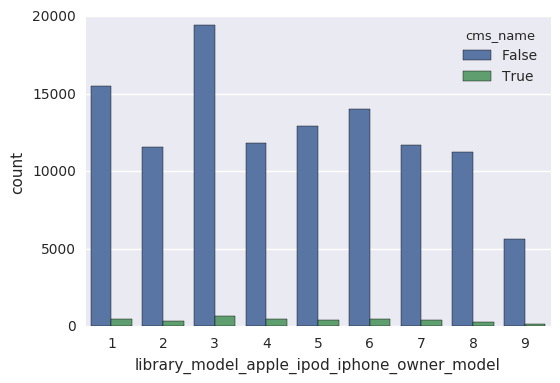

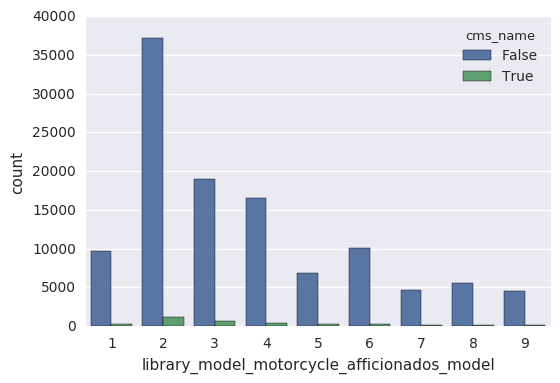

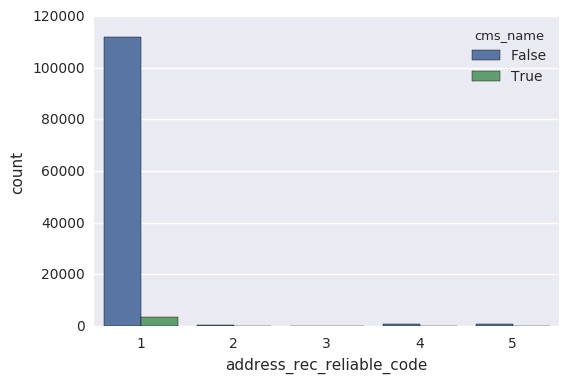

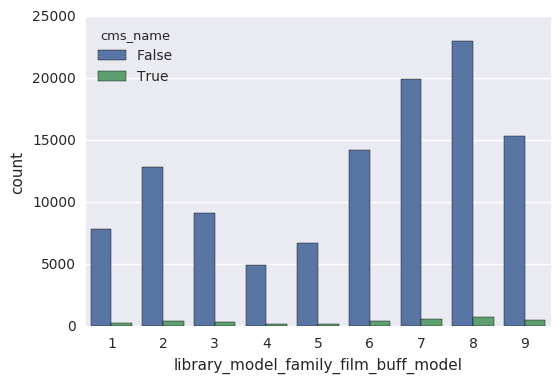

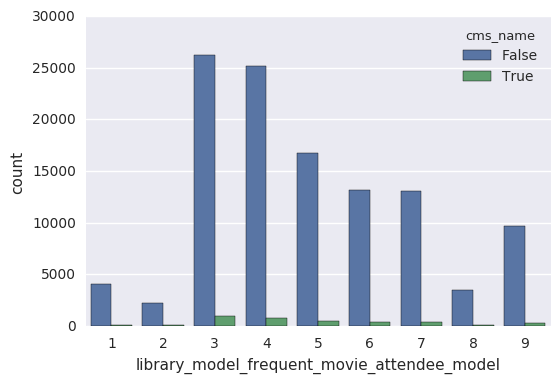

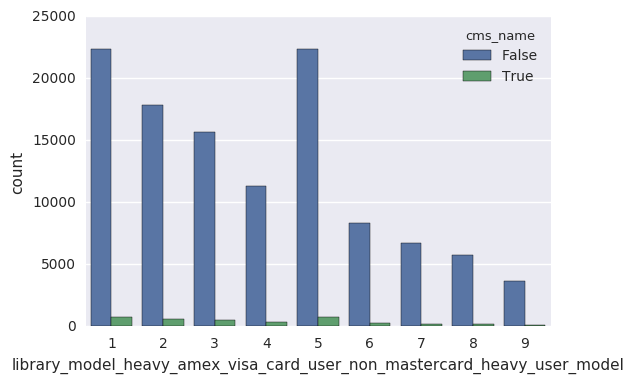

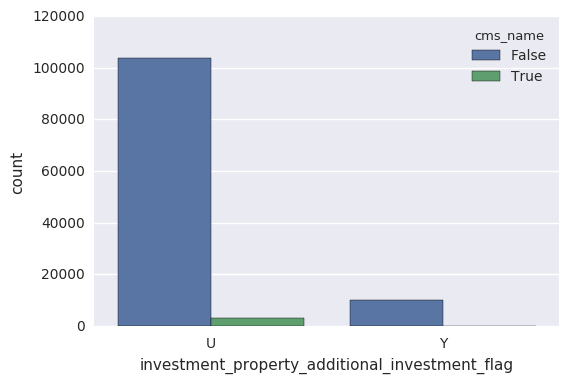

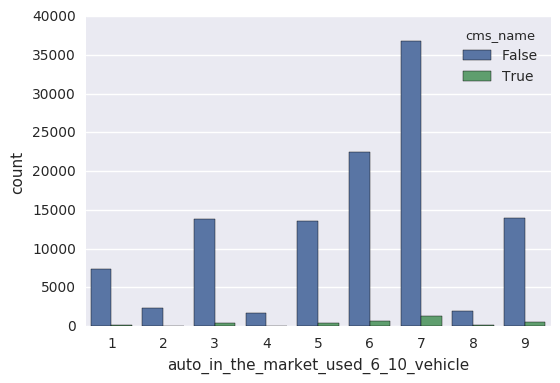

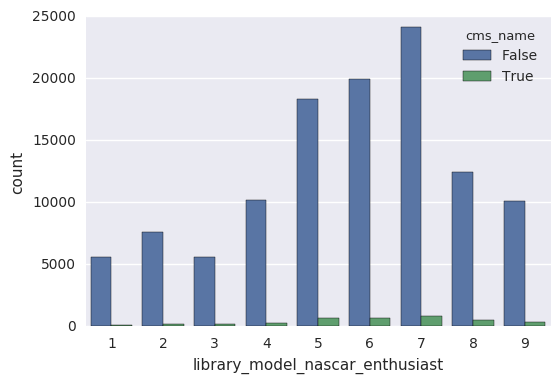

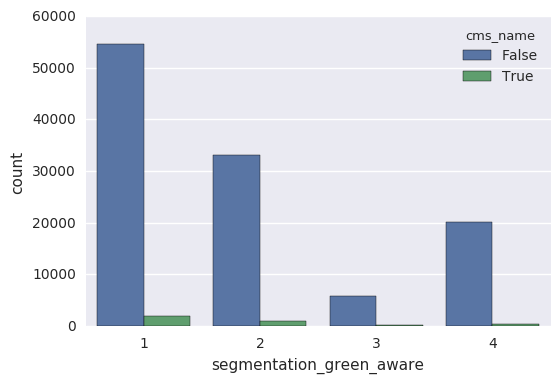

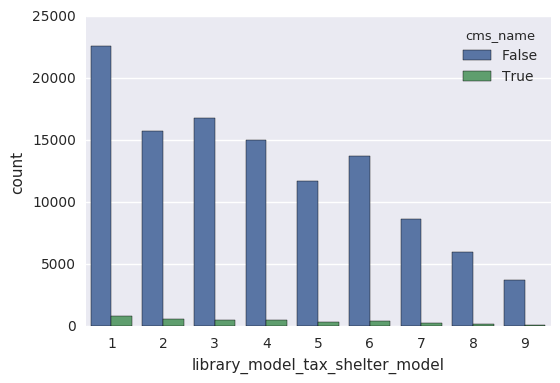

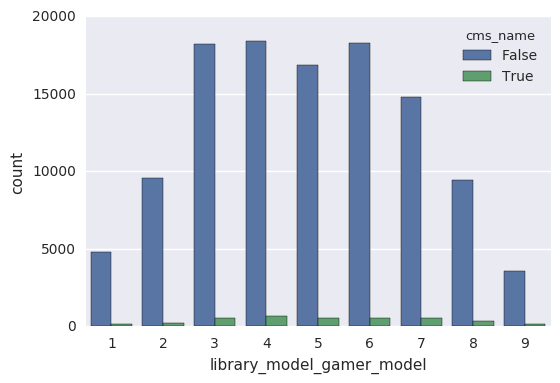

In [178]:
for i in [i for i in semf.columns if ((semf[i].dtype == object) & (len(semf[i].unique()) < 10))]:
    plt.figure()
    sns.countplot(x=i,hue='cms_name',data=semf)

In [179]:
# Encoding categorical variables
# Creating train validation holdout sets.

train_x = semf[semf.columns[~semf.columns.isin(['contact_id','cms_name','living_unit_id','address_id'])]]
train_y = semf.cms_name

le = preprocessing.LabelEncoder()
train_x.loc[:,train_x.dtypes == object] = train_x.loc[:,train_x.dtypes == object].apply(le.fit_transform,axis = 1)

x_train,x_validation,x_holdout,y_train,y_validation,y_holdout = test_validation_holdout_split(train_x,train_y,0.15)


In [180]:
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)

In [181]:
a = lr.predict_proba(x_train)
probs = np.array([i[1] for i in a])

In [182]:
confusion_matrix(y_train,probs> 0.05)

array([[81757,   448],
       [ 2550,    23]])

In [183]:
train_y.dtype

dtype('bool')

In [184]:
a = lr.predict_proba(x_validation)
probs1 = np.array([i[1] for i in a])

In [185]:
confusion_matrix(y_validation,probs1> 0.05)

array([[16975,    94],
       [  530,     2]])

In [186]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_train, probs)
sklearn.metrics.auc(fpr, tpr)

0.5566537076020196

In [187]:
# I manually tuned the params to maximize the validation AUC.
rfc = ske.RandomForestClassifier(n_estimators = 200, max_depth = 12)
rfc.fit(x_train,y_train)
print("rfc fitted")
print(rfc.score(x_train,y_train))
print(rfc.score(x_validation,y_validation))

rfc fitted
0.969992214961
0.969831259588


In [188]:
b = rfc.predict_proba(x_validation)
probs2 = np.array([i[1] for i in b])

In [189]:
#Validation AUC
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_validation, probs2)
sklearn.metrics.auc(fpr, tpr)

0.72517456788611645

In [190]:
c = rfc.predict_proba(x_holdout)
probs3 = np.array([i[1] for i in c])

In [191]:
# Holdout AUC
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_holdout, probs3)
sklearn.metrics.auc(fpr, tpr)

0.73503511581546266

In [192]:
confusion_matrix(y_validation,probs2> 0.02)

array([[ 6647, 10422],
       [   58,   474]])

In [193]:
# Getting Variable importance
import operator
importances = rfc.feature_importances_
imp_dict = {}
for i in range(len(importances)):
    imp_dict[x_train.columns[i]] = importances[i]

In [194]:
#Variable importance sorted by most important variable
imps = sorted(imp_dict.items(), key=operator.itemgetter(1),reverse = True)
imps

[('assn_name', 0.05488219790511227),
 ('person_2_age', 0.0089516164944328999),
 ('mail_order_responder_mor_bank_non_deduped_category_hit_count',
  0.0078194551576731101),
 ('person_1_age', 0.0077844306048785086),
 ('census_cape_homval_oohu_median_home_value', 0.0074250775925330499),
 ('census_cape_ethnic_pop_pct_white_only', 0.0073769279720101054),
 ('segmentation_green_aware_tiers', 0.007319921985716041),
 ('census_cape_ethnic_pop_pct_asian_only', 0.007140848518367088),
 ('person_1_education_model', 0.0071237480301704435),
 ('living_unit_length_of_residence', 0.0070975418429256865),
 ('census_cape_age_pop_median_age', 0.007066362303220222),
 ('living_unit_est_household_income_v5', 0.0070627535449628723),
 ('library_model_coin_collector', 0.0068753838116781939),
 ('census_cape_typ_hh_pct_married_couple_family', 0.0065947161870350225),
 ('library_model_scifi_movie_buff', 0.0064915335466186174),
 ('census_cape_tenancy_occhu_pct_renter_occupied', 0.0064741120425221045),
 ('census_cape_chi

In [195]:
len(imps)

225

In [207]:
auc_list = []
for q in range(1,16):
    rfc1 = ske.RandomForestClassifier(n_estimators = 50, max_depth = 8)
    rfc1.fit(x_train[[i[0] for i in imps][:q]],y_train)
    z = rfc1.predict_proba(x_validation[[i[0] for i in imps][:q]])
    probs10 = np.array([i[1] for i in z])
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_validation, probs10)
    auc_list.append(sklearn.metrics.auc(fpr, tpr))[i[0] for i in imps][:6]

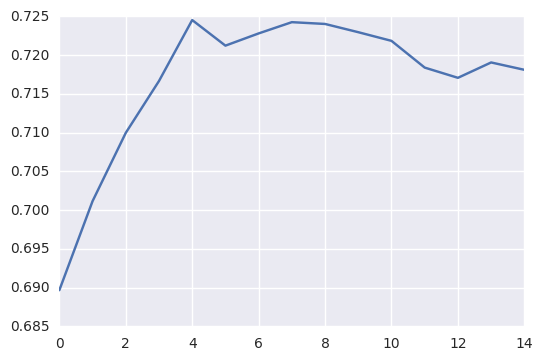

In [208]:
plt.plot(auc_list)

In [209]:
auc_list1 = []
for q in range(16,len(imps),16):
    rfc1 = ske.RandomForestClassifier(n_estimators = 50, max_depth = 8)
    rfc1.fit(x_train[[i[0] for i in imps][:q]],y_train)
    z = rfc1.predict_proba(x_validation[[i[0] for i in imps][:q]])
    probs10 = np.array([i[1] for i in z])
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_validation, probs10)
    auc_list1.append(sklearn.metrics.auc(fpr, tpr))

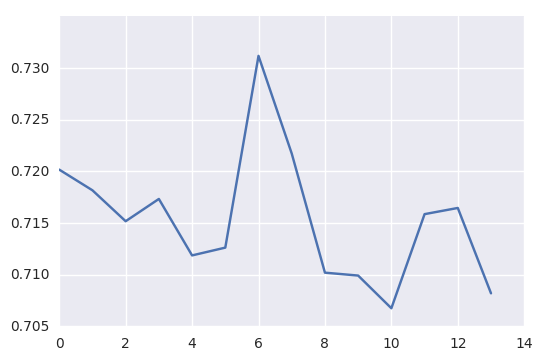

In [210]:
plt.plot(auc_list1)

In [ ]:
rfc_final = ske.RandomForestClassifier(n_estimators = 500, max_depth = 10)
rfc_final.fit(x_train[[i[0] for i in imps][:9]],y_train)
print("rfc fitted")

In [ ]:
z = rfc_final.predict_proba(x_validation[[i[0] for i in imps][:9]])
probs10 = np.array([i[1] for i in z])

In [ ]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_validation, probs10)
sklearn.metrics.auc(fpr, tpr)

In [ ]:
y = rfc_final.predict_proba(x_holdout[[i[0] for i in imps][:9]])
probs11 = np.array([i[1] for i in y])

In [ ]:
#holdout AUC
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_holdout, probs11)
sklearn.metrics.auc(fpr, tpr)